LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import re
import os
import time


EXPLORATION OF DATA

In [ ]:
df=pd.read_csv('/content/data.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

ï»¿      ID               Name  Age  \
0    0  158023           L. Messi   31   
1    1   20801  Cristiano Ronaldo   33   
2    2  190871          Neymar Jr   26   
3    3  193080             De Gea   27   
4    4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0      â¬226.5M  
1      7.0        11.0       15.0           14.0       11.0      â¬127.1M  
2      9.0         9.0       15.0           15.0       11.0      â¬228.1M  
3     90.0        85.0       87.0           88.0       94.0      â¬138.6M  
4     15.0        13.0        5.0           10.0       13.0      â¬196.4M  

[5 rows x 89 columns]

In [ ]:
df.tail(5)

ï»¿      ID                Name  Age  \
18202  18202  238813        J. Lundstram   19   
18203  18203  243165  N. Christoffersson   19   
18204  18204  241638           B. Worman   16   
18205  18205  246268      D. Walker-Rice   17   
18206  18206  246269           G. Nugent   16   

                                                Photo Nationality  \
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
18202   Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
18203    Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
18204  Cambridge United  ...      41.0    32.0           13.0           11.0   
18205   Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
18206   Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

      GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
18202     10.0        13.0        7.0            8.0        9.0        â¬143K  
18203     10.0         9.0        9.0            5.0       12.0        â¬113K  
18204      6.0         5.0       10.0            6.0       13.0        â¬165K  
18205     14.0         6.0       14.0            8.0        9.0        â¬143K  
18206     10.0        15.0        9.0           12.0        9.0        â¬165K  

[5 rows x 89 columns]

In [ ]:
df.sample(10)

ï»¿      ID           Name  Age  \
8045    8045  219480          Naldo   28   
12293  12293  222266     J. Bartosz   21   
12871  12871  185291      K. Debaty   29   
3191    3191  244470      V. Coufal   25   
16953  16953  240340      C. Zuvela   21   
2833    2833  194146        K. Long   27   
6608    6608  178430        N. Frey   34   
2537    2537  229595  L. RodrÃ­guez   21   
1763    1763  225116       A. Meret   21   
11506  11506  220542   R. QuiÃ±onez   26   

                                                Photo          Nationality  \
8045   https://cdn.sofifa.org/players/4/19/219480.png               Brazil   
12293  https://cdn.sofifa.org/players/4/19/222266.png               Poland   
12871  https://cdn.sofifa.org/players/4/19/185291.png              Belgium   
3191   https://cdn.sofifa.org/players/4/19/244470.png       Czech Republic   
16953  https://cdn.sofifa.org/players/4/19/240340.png            Australia   
2833   https://cdn.sofifa.org/players/4/19/194146.png  Republic of Ireland   
6608   https://cdn.sofifa.org/players/4/19/178430.png               France   
2537   https://cdn.sofifa.org/players/4/19/229595.png            Argentina   
1763   https://cdn.sofifa.org/players/4/19/225116.png                Italy   
11506  https://cdn.sofifa.org/players/4/19/220542.png              Bolivia   

                                       Flag  Overall  Potential  \
8045    https://cdn.sofifa.org/flags/54.png       67         67   
12293   https://cdn.sofifa.org/flags/37.png       63         73   
12871    https://cdn.sofifa.org/flags/7.png       63         64   
3191    https://cdn.sofifa.org/flags/12.png       73         76   
16953  https://cdn.sofifa.org/flags/195.png       56         67   
2833    https://cdn.sofifa.org/flags/25.png       73         73   
6608    https://cdn.sofifa.org/flags/18.png       69         69   
2537    https://cdn.sofifa.org/flags/52.png       74         83   
1763    https://cdn.sofifa.org/flags/27.png       75         89   
11506   https://cdn.sofifa.org/flags/53.png       64         67   

                          Club  ... Composure Marking StandingTackle  \
8045                  Al Fayha  ...      52.0    67.0           70.0   
12293           WisÅa KrakÃ³w  ...      62.0    52.0           61.0   
12871         Waasland-Beveren  ...      26.0    18.0           19.0   
3191           SK Slavia Praha  ...      62.0    72.0           73.0   
16953                Sydney FC  ...      49.0    49.0           53.0   
2833                   Burnley  ...      66.0    72.0           73.0   
6608             Chievo Verona  ...      75.0    60.0           75.0   
2537   Estudiantes de La Plata  ...      68.0    67.0           42.0   
1763                    Napoli  ...      67.0    10.0           21.0   
11506                      NaN  ...      33.0    18.0           17.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
8045            68.0      8.0        12.0        9.0           14.0   
12293           59.0     13.0         7.0       10.0           14.0   
12871           17.0     65.0        61.0       50.0           64.0   
3191            72.0     13.0        12.0       12.0            6.0   
16953           49.0     14.0        13.0       15.0            7.0   
2833            72.0      8.0        14.0        7.0            8.0   
6608            72.0     10.0        12.0        7.0           10.0   
2537            50.0     14.0         9.0       12.0           14.0   
1763            12.0     77.0        71.0       66.0           75.0   
11506           15.0     66.0        63.0       66.0           62.0   

      GKReflexes Release Clause  
8045        11.0          â¬1M  
12293        9.0        â¬814K  
12871       62.0        â¬442K  
3191        13.0        â¬9.4M  
16953       13.0        â¬218K  
2833         7.0        â¬6.4M  
6608        14.0        â¬510K  
2537        13.0       â¬14.5M  
1763        78.0       â¬27.9M  
11506       

In [ ]:
#correlation among all the columns
df.corr()

ï»¿        ID       Age   Overall  Potential  \
ï»¿                       1.000000  0.415757 -0.454846 -0.972791  -0.633395   
ID                        0.415757  1.000000 -0.739208 -0.417025   0.047074   
Age                      -0.454846 -0.739208  1.000000  0.452350  -0.253312   
Overall                  -0.972791 -0.417025  0.452350  1.000000   0.660939   
Potential                -0.633395  0.047074 -0.253312  0.660939   1.000000   
Special                  -0.596508 -0.231352  0.236695  0.606960   0.383727   
International Reputation -0.413322 -0.356191  0.253765  0.499491   0.372993   
Weak Foot                -0.204026 -0.075784  0.059867  0.212015   0.162346   
Skill Moves              -0.415672 -0.056914  0.027649  0.414463   0.354290   
Jersey Number             0.213645  0.182074 -0.241156 -0.218931  -0.010474   
Crossing                 -0.390062 -0.131994  0.130545  0.394972   0.246319   
Finishing                -0.325529 -0.082323  0.068660  0.332515   0.243355   
HeadingAccuracy          -0.337766 -0.106815  0.147183  0.340776   0.200988   
ShortPassing             -0.492495 -0.136279  0.132894  0.502550   0.369189   
Volleys                  -0.384285 -0.159915  0.142472  0.391338   0.254906   
Dribbling                -0.364106 -0.030340  0.010166  0.372426   0.315019   
Curve                    -0.416378 -0.169511  0.143276  0.419491   0.279944   
FKAccuracy               -0.395433 -0.199549  0.193467  0.396892   0.230544   
LongPassing              -0.477500 -0.186764  0.181310  0.483909   0.321437   
BallControl              -0.449655 -0.100184  0.084969  0.460197   0.354396   
Acceleration             -0.185030  0.133236 -0.158667  0.196869   0.234608   
SprintSpeed              -0.198797  0.132437 -0.151682  0.210647   0.236771   
Agility                  -0.256270 -0.019897 -0.019395  0.264952   0.222310   
Reactions                -0.832156 -0.408617  0.453124  0.850045   0.513425   
Balance                  -0.097160  0.048463 -0.089877  0.103160   0.138025   
ShotPower                -0.440023 -0.166133  0.156947  0.441118   0.288318   
Jumping                  -0.261581 -0.169369  0.177167  0.264435   0.109151   
Stamina                  -0.358451 -0.053895  0.097793  0.365656   0.202563   
Strength                 -0.342839 -0.259756  0.332798  0.349326   0.075769   
LongShots                -0.417853 -0.161549  0.155096  0.420795   0.266740   
Aggression               -0.397067 -0.228329  0.265190  0.395470   0.171174   
Interceptions            -0.319162 -0.160602  0.197845  0.321326   0.154908   
Positioning              -0.351820 -0.088330  0.082443  0.356493   0.245616   
Vision                   -0.490296 -0.215170  0.187422  0.498894   0.348141   
Penalties                -0.337899 -0.140657  0.139535  0.341429   0.224281   
Composure                -0.716173 -0.384473  0.391023  0.727655   0.440008   
Marking                  -0.280829 -0.110198  0.142817  0.286505   0.162801   
StandingTackle           -0.248564 -0.085929  0.119745  0.252629   0.143564   
SlidingTackle            -0.220034 -0.068409  0.103089  0.222811   0.128980   
GKDiving                  0.027757 -0.105594  0.101277 -0.025937  -0.053446   
GKHandling                0.027026 -0.111149  0.106419 -0.025062  -0.054672   
GKKicking                 0.030654 -0.106652  0.104964 -0.029372  -0.059061   
GKPositioning             0.019842 -0.118250  0.116402 -0.017674  -0.052589   
GKReflexes                0.025610 -0.105778  0.103313 -0.023276  -0.053341   

                           Special  International Reputation  Weak Foot  \
ï»¿                      -0.596508                 -0.413322  -0.204026   
ID                       -0.231352                 -0.356191  -0.075784   
Age                       0.236695                  0.253765   0.059867   
Overall                   0.606960                  0.499491   0.212015   
Potential                 0.383727                  0.372993   0.162346   
Special                  

In [ ]:
#renaming columns
df= df.rename(columns={ 'Work Rate': 'Working Rate', 'Jersey Number':'Jersey No' })
df.columns

Index(['ï»¿', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Working Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey No', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 

In [ ]:
#describing the statistical values
df.describe()

ï»¿             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

          Jersey No  ...     Penalties     Composure       Marking  \
count  18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean      19.546096  ...     48.548598     58.648274     47.281623   
std       15.947765  ...     15.704053     11.436133     19.904397   
min        1.000000  ...      5.000000      3.000000      3.000000   
25%        8.000000  ...     39.000000     51.000000     30.000000   
50%       17.000000  ...     49.000000     60.000000     53.000000   
75%       26.000000  ...     60.000000     67.000000     64.000000   
max       99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [ ]:
#information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿                       18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df.head()

ï»¿      ID               Name  Age  \
0    0  158023           L. Messi   31   
1    1   20801  Cristiano Ronaldo   33   
2    2  190871          Neymar Jr   26   
3    3  193080             De Gea   27   
4    4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0      â¬226.5M  
1      7.0        11.0       15.0           14.0       11.0      â¬127.1M  
2      9.0         9.0       15.0           15.0       11.0      â¬228.1M  
3     90.0        85.0       87.0           88.0       94.0      â¬138.6M  
4     15.0        13.0        5.0           10.0       13.0      â¬196.4M  

[5 rows x 89 columns]

In [ ]:
#shape of the dataset
df.shape  

(18207, 89)

In [ ]:
df.columns = [c.replace(' ', '') for c in df.columns]
df.columns

Index(['ï»¿', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkingRate', 'BodyType', 'RealFace', 'Position', 'JerseyNo', 'Joined',
       'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       

In [ ]:
#checking for null values
df.isnull().sum()

ï»¿                 0
ID                  0
Name                0
Age                 0
Photo               0
                 ... 
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
ReleaseClause    1564
Length: 89, dtype: int64

In [ ]:
#  comparison of international reputation among the players

df['InternationalReputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: InternationalReputation, dtype: int64

In [ ]:
# A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 
# which specifies the shot power and ball control for the other foot of that player than his preferred foot's.The higher
# rate defines the higher shot power and ball control.

df['WeakFoot'].value_counts()

3.0    11349
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: WeakFoot, dtype: int64

In [ ]:
#individual statistical functions
df['Balance'].value_counts()

68.0    604
70.0    594
65.0    589
66.0    589
67.0    587
       ... 
96.0      5
16.0      3
17.0      3
19.0      3
18.0      3
Name: Balance, Length: 81, dtype: int64

In [ ]:
df['Nationality'].value_counts()

England                   1662
Germany                   1198
Spain                     1072
Argentina                  937
France                     914
                          ... 
New Caledonia                1
Fiji                         1
SÃ£o TomÃ© & PrÃ­ncipe       1
United Arab Emirates         1
Botswana                     1
Name: Nationality, Length: 164, dtype: int64

In [ ]:
df['Balance'].mean()

63.966573049176716

In [ ]:
df['Balance'].median()

66.0

In [ ]:
df['Age'].mean()

25.122205745043114

In [ ]:
df['Age'].median()

25.0

In [ ]:
# best players per each position with their age, club, and nationality based on their overall scores

df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]


Position               Name  Age                       Club Nationality
17       CAM       A. Griezmann   27           AtlÃ©tico Madrid      France
12        CB          D. GodÃ­n   32           AtlÃ©tico Madrid     Uruguay
20       CDM    Sergio Busquets   29               FC Barcelona       Spain
271       CF       Luis Alberto   25                      Lazio       Spain
67        CM             Thiago   27         FC Bayern MÃ¼nchen       Spain
3         GK             De Gea   27          Manchester United       Spain
28       LAM      J. RodrÃ­guez   26         FC Bayern MÃ¼nchen    Colombia
35        LB            Marcelo   30                Real Madrid      Brazil
24       LCB       G. Chiellini   33                   Juventus       Italy
11       LCM           T. Kroos   28                Real Madrid     Germany
14       LDM          N. KantÃ©   27                    Chelsea      France
5         LF          E. Hazard   27                    Chelsea     Belgium
33        LM      P. Aubameyang   29                    Arsenal       Gabon
21        LS          E. Cavani   31        Paris Saint-Germain     Uruguay
2         LW          Neymar Jr   26        Paris Saint-Germain      Brazil
474      LWB          N. Schulz   25        TSG 1899 Hoffenheim     Germany
129      RAM        J. Cuadrado   30                   Juventus    Colombia
69        RB        Azpilicueta   28                    Chelsea       Spain
8        RCB       Sergio Ramos   32                Real Madrid       Spain
4        RCM       K. De Bruyne   27            Manchester City     Belgium
45       RDM           P. Pogba   25          Manchester United      France
0         RF           L. Messi   31               FC Barcelona   Argentina
25        RM         K. MbappÃ©   19        Paris Saint-Germain      France
7         RS         L. SuÃ¡rez   31               FC Barcelona     Uruguay
56        RW     Bernardo Silva   23            Manchester City    Portugal
450      RWB          M. Ginter   24  Borussia MÃ¶nchengladbach     Germany
1         ST  Cristiano Ronaldo   33                   Juventus    Portugal

In [ ]:
# best players from each positions with their age, nationality, club based on their potential scores

df.iloc[df.groupby(df['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position                   Name  Age                     Club Nationality
31       CAM             C. Eriksen   26        Tottenham Hotspur     Denmark
42        CB              S. Umtiti   24             FC Barcelona      France
27       CDM               Casemiro   26              Real Madrid      Brazil
350       CF               A. Milik   24                   Napoli      Poland
78        CM  S. MilinkoviÄ-SaviÄ   23                    Lazio      Serbia
3         GK                 De Gea   27        Manchester United       Spain
28       LAM          J. RodrÃ­guez   26       FC Bayern MÃ¼nchen    Colombia
35        LB                Marcelo   30              Real Madrid      Brazil
77       LCB           M. Å kriniar   23                    Inter    Slovakia
11       LCM               T. Kroos   28              Real Madrid     Germany
14       LDM              N. KantÃ©   27                  Chelsea      France
15        LF              P. Dybala   24                 Juventus   Argentina
415       LM               H. Aouar   20       Olympique Lyonnais      France
21        LS              E. Cavani   31      Paris Saint-Germain     Uruguay
2         LW              Neymar Jr   26      Paris Saint-Germain      Brazil
601      LWB                  Jonny   24  Wolverhampton Wanderers       Spain
171      RAM              H. Ziyech   25                     Ajax     Morocco
247       RB          JoÃ£o Cancelo   24                 Juventus    Portugal
8        RCB           Sergio Ramos   32              Real Madrid       Spain
4        RCM           K. De Bruyne   27          Manchester City     Belgium
45       RDM               P. Pogba   25        Manchester United      France
0         RF               L. Messi   31             FC Barcelona   Argentina
25        RM             K. MbappÃ©   19      Paris Saint-Germain      France
7         RS             L. SuÃ¡rez   31             FC Barcelona     Uruguay
79        RW          Marco Asensio   22              Real Madrid       Spain
766      RWB           Pablo Maffeo   20            VfB Stuttgart       Spain
1         ST      Cristiano Ronaldo   33                 Juventus    Portugal

In [ ]:
# finding the the popular clubs around the globe

df['Club'].value_counts().head(10)

FC Barcelona           33
Valencia CF            33
Fortuna DÃ¼sseldorf    33
Cardiff City           33
Rayo Vallecano         33
CD LeganÃ©s            33
Frosinone              33
Newcastle United       33
Southampton            33
Burnley                33
Name: Club, dtype: int64

In [ ]:
# finding 15 youngest Players from the dataset

youngest = df.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166       N. AyÃ©va   16         Ãrebro SK               Sweden
17712        K. Broda   16     WisÅa KrakÃ³w               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16      IFK GÃ¶teborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091       A. DoÄan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [ ]:
# finding 15 eldest players from the dataset

eldest = df.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                           Club        Nationality
4741         O. PÃ©rez   45                        Pachuca             Mexico
18183    K. Pilkington   44               Cambridge United            England
17726        T. Warner   44             Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                 Nagoya Grampus              Japan
7225         C. MuÃ±oz   41  CD Universidad de ConcepciÃ³n          Argentina
1120         J. Villar   41                            NaN           Paraguay
12192     H. Sulaimani   41                      Ohod Club       Saudi Arabia
15426         M. Tyler   41            Peterborough United            England
4228          B. Nivet   41                   ESTAC Troyes             France
10356         F. Kippe   40                 LillestrÃ¸m SK             Norway
16264  P. van der Vlag   40                       FC Emmen        Netherlands
9484       B. Castillo   40                AtlÃ©tico Huila      

In [ ]:
# Top 10 left footed footballers

df[df['PreferredFoot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age                Club Nationality
0        L. Messi   31        FC Barcelona   Argentina
13    David Silva   32     Manchester City       Spain
15      P. Dybala   24            Juventus   Argentina
17   A. Griezmann   27    AtlÃ©tico Madrid      France
19    T. Courtois   26         Real Madrid     Belgium
24   G. Chiellini   33            Juventus       Italy
26       M. Salah   26           Liverpool       Egypt
28  J. RodrÃ­guez   26  FC Bayern MÃ¼nchen    Colombia
35        Marcelo   30         Real Madrid      Brazil
36        G. Bale   28         Real Madrid       Wales

In [ ]:
# Top 10 Right footed footballers

df[df['PreferredFoot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6          L. ModriÄ   32          Real Madrid     Croatia
7          L. SuÃ¡rez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25     AtlÃ©tico Madrid    Slovenia
10     R. Lewandowski   29   FC Bayern MÃ¼nchen      Poland

In [ ]:
# visualizing clubs with highest number of different countries

df.groupby(df['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
Brighton & Hove Albion    21
Fulham                    19
Empoli                    18
Napoli                    18
Udinese                   18
West Ham United           18
Eintracht Frankfurt       18
Lazio                     18
AS Monaco                 18
Bologna                   17
Name: Nationality, dtype: int64

In [ ]:
# visualizing clubs with highest number of different countries

df.groupby(df['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
Santos                        1
CearÃ¡ Sporting Club          1
AmÃ©rica FC (Minas Gerais)    1
ParanÃ¡                       1
Chapecoense                   1
Padova                        1
Cittadella                    1
Sangju Sangmu FC              1
Ranheim Fotball               1
CA Osasuna                    1
Name: Nationality, dtype: int64

DATA PREPROCESSING

In [ ]:
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

Creating position 4 and 13

In [ ]:
df['Position (4)'] = df['Position'].replace(to_replace=['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], value= 'attack')
df['Position (4)'] = df['Position (4)'].replace(to_replace=['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'LAM', 'RAM'], value= 'middle')
df['Position (4)'] = df['Position (4)'].replace(to_replace=['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB'], value= 'defense')
df['Position (4)'] = df['Position (4)'].replace(to_replace=['GK'], value= 'goalkeeper')



In [ ]:
df.columns

Index(['ï»¿', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkingRate', 'BodyType', 'RealFace', 'Position', 'JerseyNo', 'Joined',
       'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       

Removing unnecessary columns

In [ ]:
df=df.drop(['ï»¿'], axis=1)

In [ ]:
list(df)

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'ClubLogo',
 'Value',
 'Wage',
 'Special',
 'PreferredFoot',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'WorkingRate',
 'BodyType',
 'RealFace',
 'Position',
 'JerseyNo',
 'Joined',
 'LoanedFrom',
 'ContractValidUntil',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKic

converting length and height

In [ ]:
def transform_height(value):
    if value is np.nan:
        return value

    arr = value.split("'")
    return int(arr[0]) * 30.48 + int(arr[1]) * 2.54

In [ ]:
df['Height'] = df['Height'].apply(transform_height).astype('float64')

In [ ]:
df['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18207, dtype: float64

In [ ]:
def transform_weight(value):
    if value is np.nan:
        return value

    return value.replace('lbs', '')

In [ ]:
df['Weight'] = df['Weight'].apply(transform_weight).astype('float64')

In [ ]:
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

position value

In [ ]:
def transform_specific_position_value(value):
    if value is np.nan:
        return value
        
    return float(value.split('+')[0])

In [ ]:
ll=list(df)
ll=ll[27:53]
ll

['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

In [ ]:
for specific_position in ll:
            df[specific_position] = df[specific_position].apply(transform_specific_position_value).astype('float64')

In [ ]:
list(df)

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'ClubLogo',
 'Value',
 'Wage',
 'Special',
 'PreferredFoot',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'WorkingRate',
 'BodyType',
 'RealFace',
 'Position',
 'JerseyNo',
 'Joined',
 'LoanedFrom',
 'ContractValidUntil',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKic

In [ ]:
df.iloc[:,27:53]

LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  ...   LWB  \
0      88.0  88.0  88.0  92.0  93.0  93.0  93.0  92.0  93.0  93.0  ...  64.0   
1      91.0  91.0  91.0  89.0  90.0  90.0  90.0  89.0  88.0  88.0  ...  65.0   
2      84.0  84.0  84.0  89.0  89.0  89.0  89.0  89.0  89.0  89.0  ...  65.0   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4      82.0  82.0  82.0  87.0  87.0  87.0  87.0  87.0  88.0  88.0  ...  77.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18202  42.0  42.0  42.0  44.0  44.0  44.0  44.0  44.0  45.0  45.0  ...  44.0   
18203  45.0  45.0  45.0  39.0  42.0  42.0  42.0  39.0  40.0  40.0  ...  30.0   
18204  45.0  45.0  45.0  45.0  46.0  46.0  46.0  45.0  44.0  44.0  ...  34.0   
18205  47.0  47.0  47.0  47.0  46.0  46.0  46.0  47.0  45.0  45.0  ...  36.0   
18206  43.0  43.0  43.0  45.0  44.0  44.0  44.0  45.0  45.0  45.0  ...  46.0   

        LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  
0      61.0  61.0  61.0  64.0  59.0  47.0  47.0  47.0  59.0  
1      61.0  61.0  61.0  65.0  61.0  53.0  53.0  53.0  61.0  
2      60.0  60.0  60.0  65.0  60.0  47.0  47.0  47.0  60.0  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      77.0  77.0  77.0  77.0  73.0  66.0  66.0  66.0  73.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
18202  45.0  45.0  45.0  44.0  45.0  45.0  45.0  45.0  45.0  
18203  31.0  31.0  31.0  30.0  29.0  32.0  32.0  32.0  29.0  
18204  30.0  30.0  30.0  34.0  33.0  28.0  28.0  28.0  33.0  
18205  32.0  32.0  32.0  36.0  35.0  31.0  31.0  31.0  35.0  
18206  46.0  46.0  46.0  46.0  46.0  47.0  47.0  47.0  46.0  

[18207 rows x 26 columns]

money transformer

In [ ]:
def transform_wage(val):
    if val is np.nan:
        return val
    val = val.replace('â¬', '')
    if 'M' in val:
        val = val.replace('M', '')
        return float(val) * 1000000
    if 'K' in val:
        val = val.replace('K', '')
        return float(val) * 1000

In [ ]:
df['Wage'] = df['Wage'].astype('str').apply(transform_wage).astype('float64')

In [ ]:
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [ ]:
df['Value'] = df['Value'].astype('str').apply(transform_wage).astype('float64')

In [ ]:
df['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [ ]:
df['ReleaseClause'] = df['ReleaseClause'].astype('str').apply(transform_wage).astype('float64')

In [ ]:
df['ReleaseClause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: ReleaseClause, Length: 18207, dtype: float64

In [ ]:
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                        ClubLogo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ...  Marking  StandingTackle  SlidingTackle GKDiving  GKHandling  \
0      ...     33.0            28.0           26.0      6.0        11.0   
1      ...     28.0            31.0           23.0      7.0        11.0   
2      ...     27.0            24.0           33.0      9.0         9.0   
3      ...     15.0            21.0           13.0     90.0        85.0   
4      ...     68.0            58.0           51.0     15.0        13.0   
...    ...      ...             ...            ...      ...         ...   
18202  ...     40.0            48.0           47.0     10.0        13.0   
18203  ...     22.0            15.0           19.0     10.0         9.0   
18204  ...     32.0            13.0           11.0      6.0         5.0   
18205  ...     20.0            25.0           27.0     14.0         6.0   
18206  ...     40.0            43.0           50.0     10.0        15.0   

       GKKicking  GKPositioning GKReflexes Rel

***Visualization***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


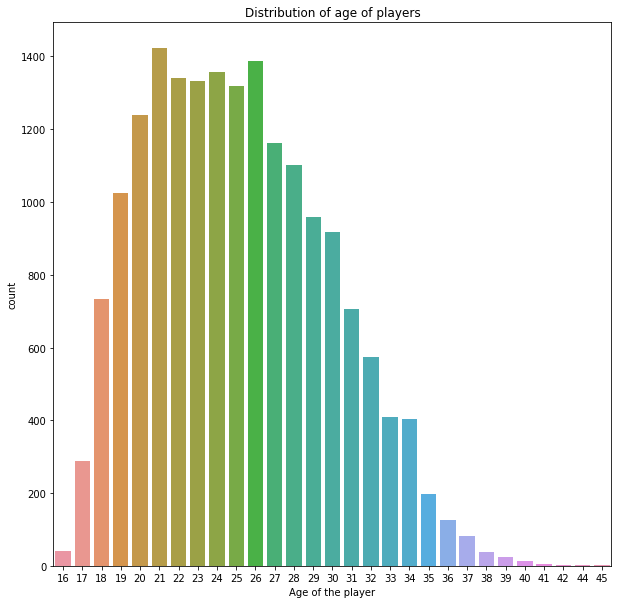

In [ ]:
x=df['Age']
plt.figure(figsize=(10,10))
ax=sns.countplot(x)
ax.set_xlabel(xlabel='Age of the player')
ax.set_title(label="Distribution of age of players")
plt.show()

In [ ]:
#Piechart

import scipy as sp
import plotly.graph_objs as go
def pie_count(data,field="Nationality", percent_limit=0.5, title="Number of players by"):

  title+=field
  data=data[field].value_counts().to_frame()

  total=data[field].sum()
  data['percentage']=100*data[field]/total

  percent_limit=percent_limit
  otherdata=data[data['percentage']<percent_limit]
  others=otherdata['percentage'].sum()
  maindata=data[data['percentage']>=percent_limit]

  data=maindata
  other_label="Others(<"+str(percent_limit)+ "%each)"
  data.loc[other_label]=pd.Series({field:otherdata[field].sum()})

  labels=data.index.tolist()
  datavals=data[field].tolist()

  trace=go.Pie(labels=labels,
               values=datavals)
  

  fig=go.Figure(data=[trace])
  fig.show()

pie_count(df,'Nationality')



In [ ]:
pie_count(df,'PreferredFoot')

In [ ]:
pie_count(df,'WorkingRate',0.1)

In [ ]:
pie_count(df,'Position',0.1)

In [ ]:
#Top 20 teams with highest player's average value

import plotly.express as px
club=df.groupby('Club')['Value'].mean().reset_index().sort_values('Value',ascending=True).tail(20)
fig=px.bar(club,x="Value",y="Club",orientation='h')
fig.show()

In [ ]:
counts_weak_foot = df["WeakFoot"].value_counts()
counts_weak_foot = counts_weak_foot.reset_index()
counts_weak_foot.columns = ["WeakFoot","Count"]
print(counts_weak_foot)

   WeakFoot  Count
0       3.0  11349
1       2.0   3761
2       4.0   2662
3       5.0    229
4       1.0    158


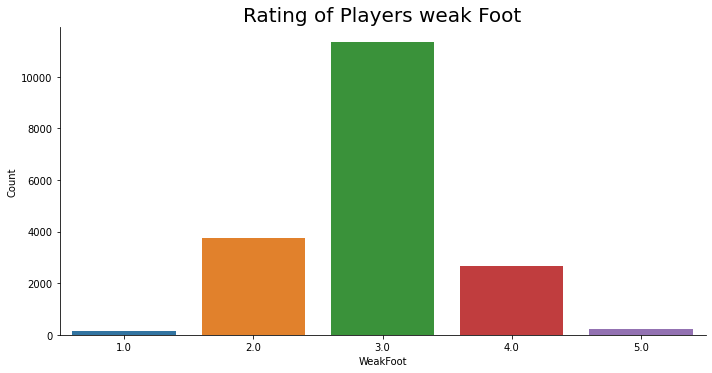

In [ ]:
pt = sns.catplot(y="Count",x="WeakFoot", data=counts_weak_foot,height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Rating of Players weak Foot",fontsize=20);

There are very less players with a good weak foot ratings

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



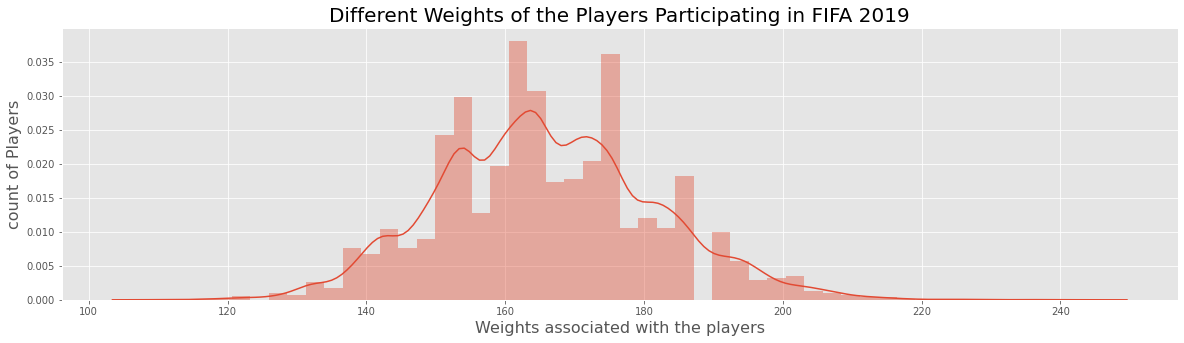

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(df['Weight'])
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Weights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
skills =df.columns[54:87].tolist()
for i in skills:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

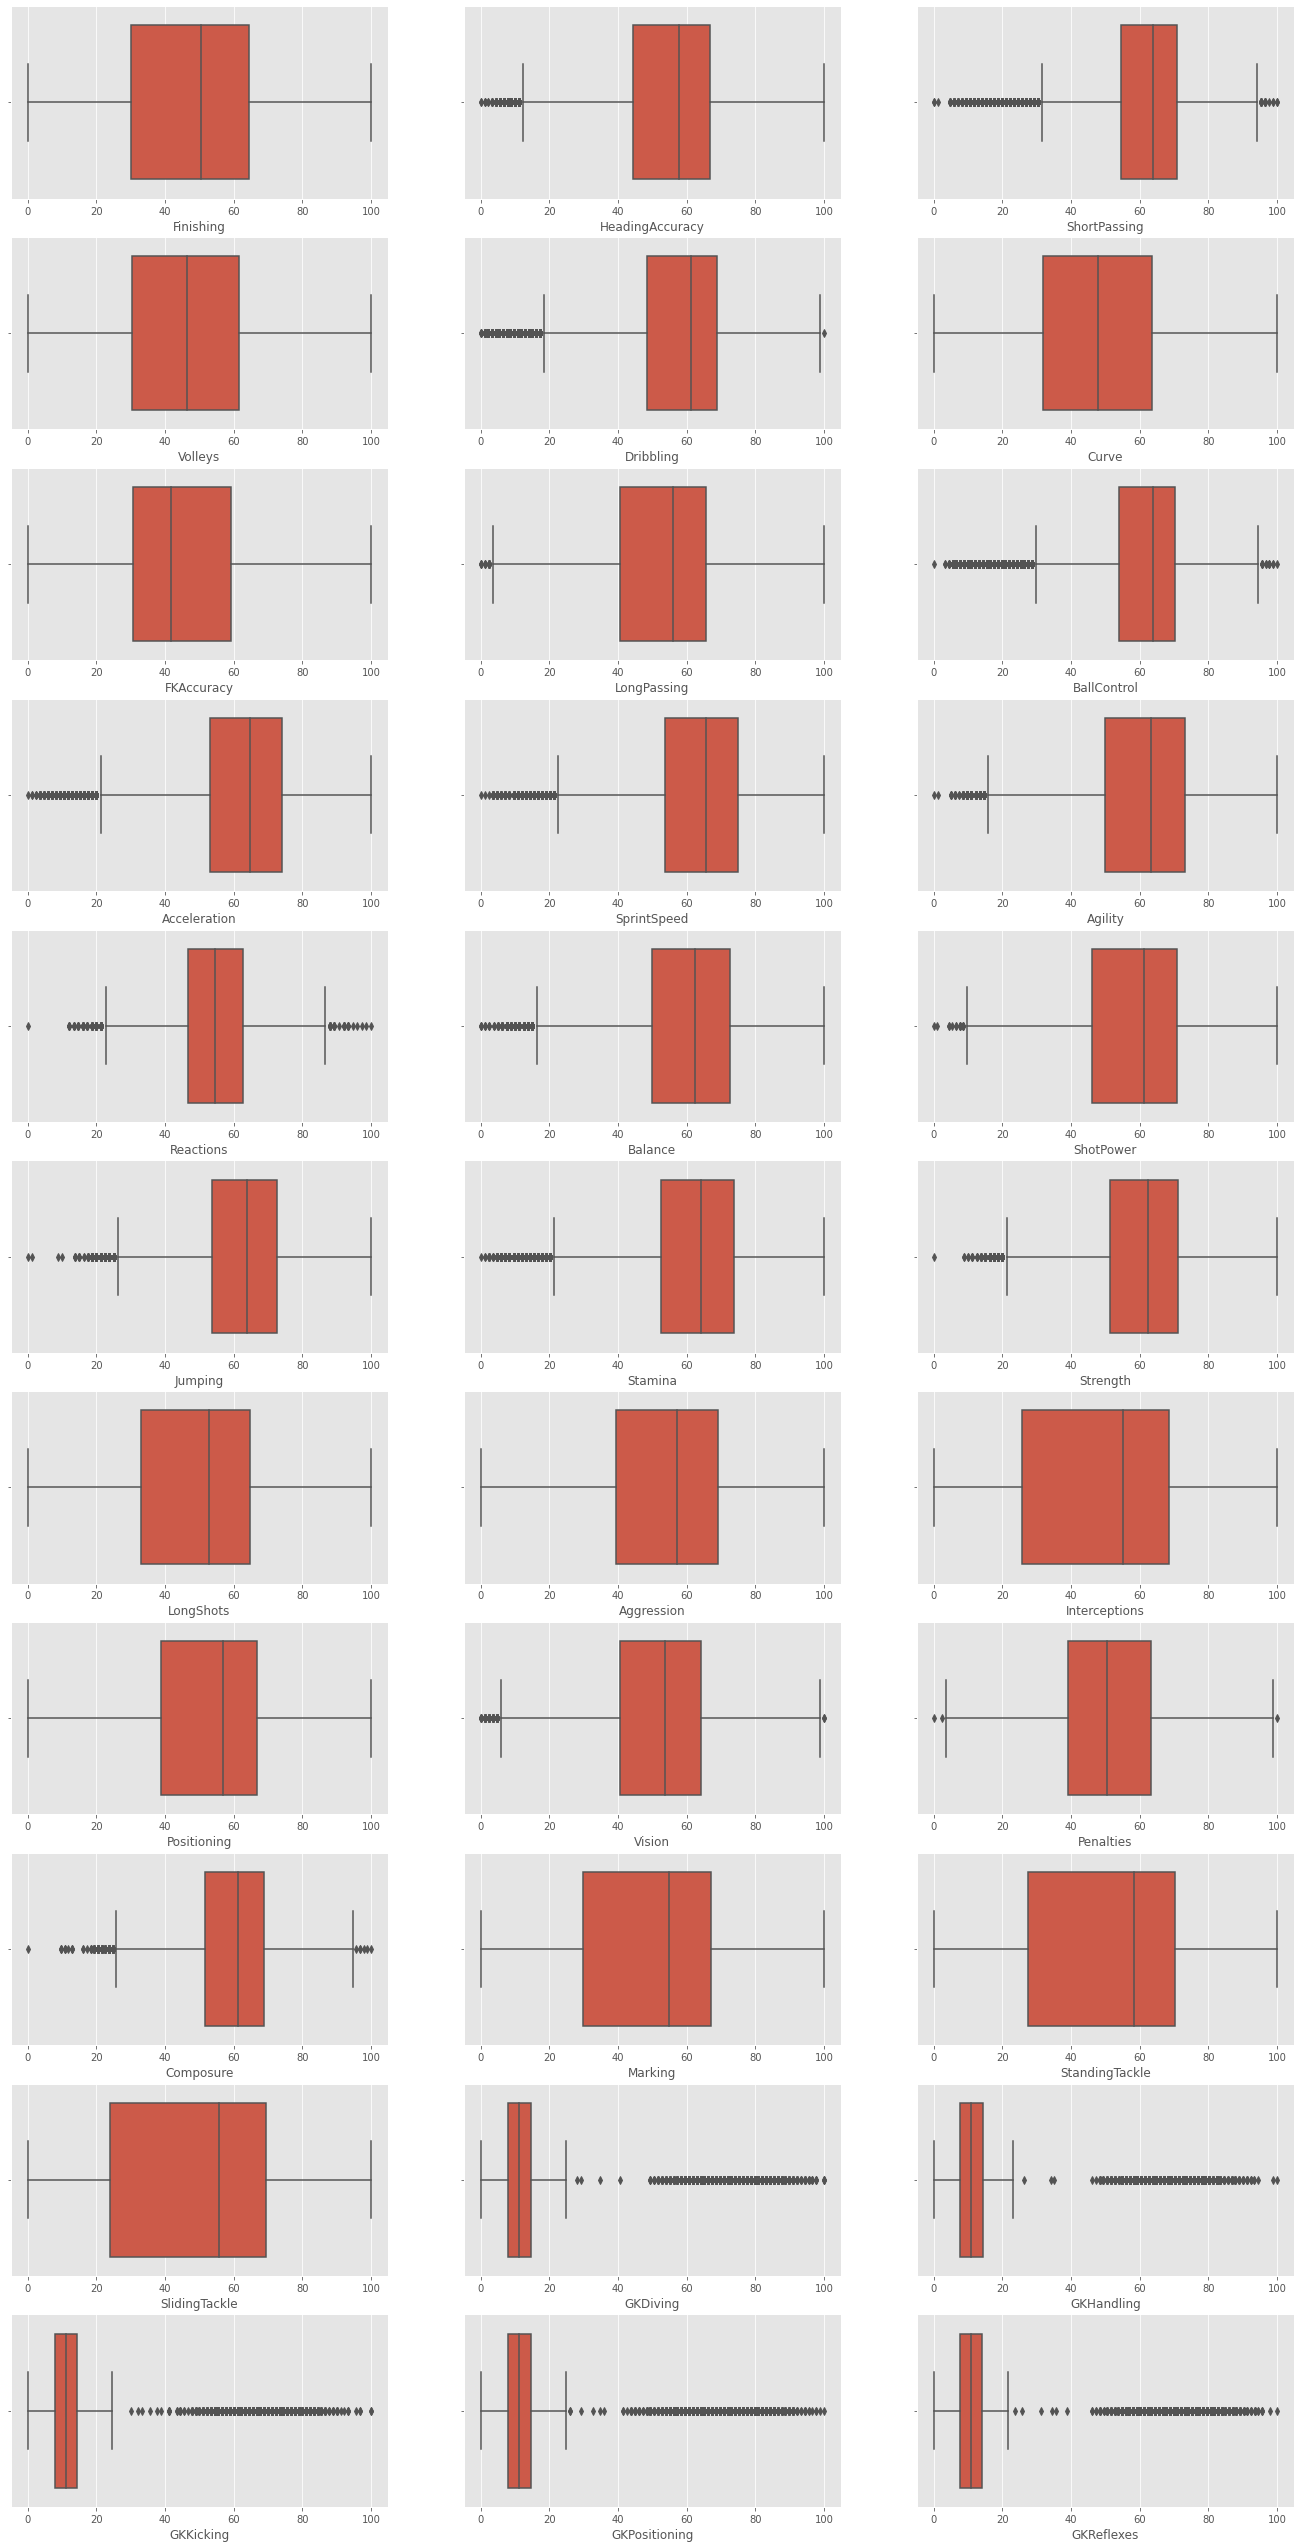

In [ ]:
#boxplot for the selected skills
plt.figure(figsize=(23,46))
j=0
for i in skills:
  plt.subplot(11,3,j+1)
  j=j+1
  sns.boxplot(x=i, data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

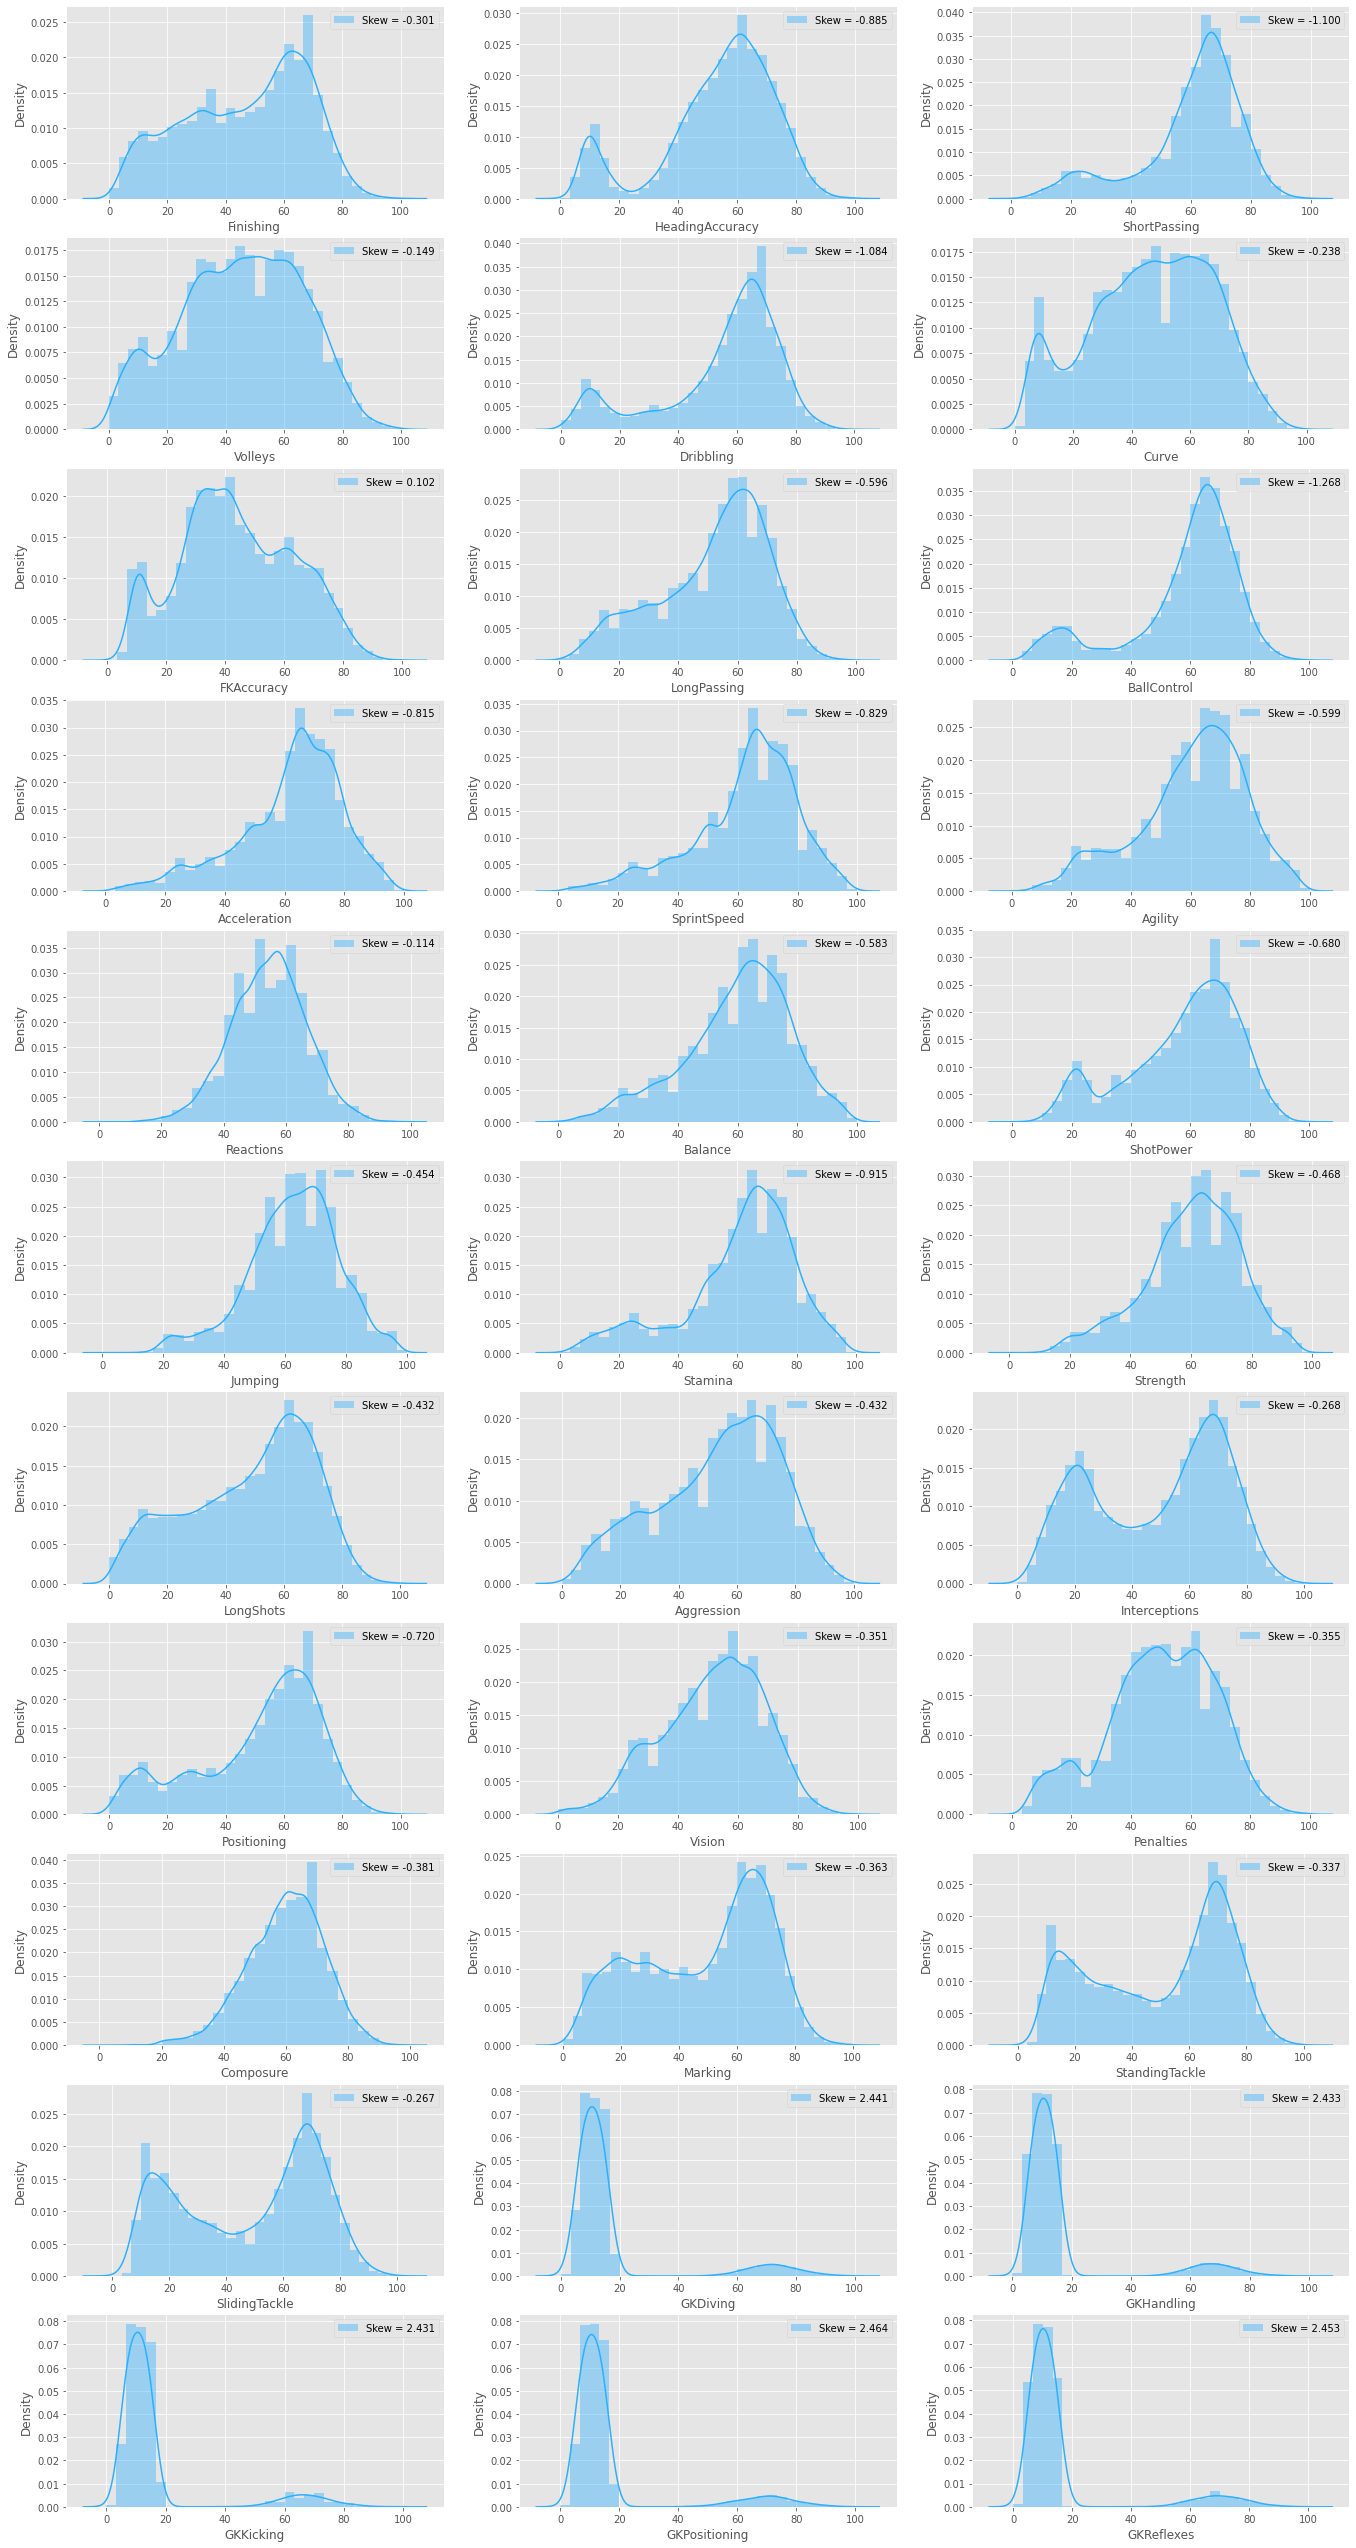

In [ ]:
plt.figure(figsize=(23,46))
j=0
for i in skills:
  skew = df[i].skew()
  plt.subplot(11,3,j+1)
  j=j+1  
  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')
  plt.legend(loc='best')

In [ ]:
#Finding Correlation of the dataset between all the columns

corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

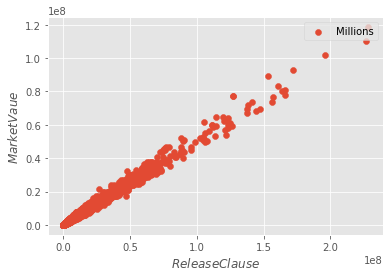

In [ ]:
x = df['ReleaseClause']
y = df['Value']
plt.scatter(x, y,label="Millions")
plt.xlabel("$Release Clause$")
plt.ylabel("$Market Vaue$")
plt.legend(loc = 'upper right')
plt.show()

FEATURE ENGINEERING

In [ ]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
cateogry_columns

['Name',
 'Photo',
 'Nationality',
 'Flag',
 'Club',
 'ClubLogo',
 'PreferredFoot',
 'WorkingRate',
 'BodyType',
 'RealFace',
 'Position',
 'Joined',
 'LoanedFrom',
 'ContractValidUntil',
 'Position (4)']

In [ ]:
integer_columns

['ID',
 'Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'JerseyNo',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'ReleaseClause']

In [ ]:
df.isnull().sum()

ID                  0
Name                0
Age                 0
Photo               0
Nationality         0
                 ... 
GKKicking          48
GKPositioning      48
GKReflexes         48
ReleaseClause    1564
Position (4)       60
Length: 89, dtype: int64

In [ ]:
for column in list(df):
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean())

In [ ]:
df.isnull().sum()

ID               0
Name             0
Age              0
Photo            0
Nationality      0
                ..
GKKicking        0
GKPositioning    0
GKReflexes       0
ReleaseClause    0
Position (4)     0
Length: 89, dtype: int64

In [ ]:
ar=list(df.describe().columns)
ar.pop(10)
ar.pop(0)
ar

['Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'ReleaseClause']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
features =['Wage','ReleaseClause','Value']
for i in features:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

In [ ]:
df['ReleaseClause']

0         99.298513
1         55.718651
2        100.000000
3         60.760587
4         86.101794
            ...    
18202      0.056996
18203      0.043843
18204      0.066641
18205      0.056996
18206      0.066641
Name: ReleaseClause, Length: 18207, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100))
features =['InternationalReputation','WeakFoot','SkillMoves']
for i in features:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

In [ ]:
df['SkillMoves']

0         75.0
1        100.0
2        100.0
3          0.0
4         75.0
         ...  
18202     25.0
18203     25.0
18204     25.0
18205     25.0
18206     25.0
Name: SkillMoves, Length: 18207, dtype: float64

In [ ]:
for i in range(62):
  ar.pop(9)
ar


['Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'ReleaseClause']

In [ ]:
df[ar]

Age  Overall  Potential       Value        Wage  Special  \
0       31       94         94   93.248375  100.000000     2202   
1       33       94         94   64.975947   71.631206     2228   
2       26       92         93  100.000000   51.241135     2143   
3       27       91         93   60.756182   45.921986     1471   
4       27       91         92   86.074774   62.765957     2281   
...    ...      ...        ...         ...         ...      ...   
18202   19       47         65    0.042198    0.000000     1307   
18203   19       47         63    0.042198    0.000000     1098   
18204   16       47         67    0.042198    0.000000     1189   
18205   17       47         66    0.042198    0.000000     1228   
18206   16       46         66    0.042198    0.000000     1321   

       InternationalReputation  WeakFoot  SkillMoves  ReleaseClause  
0                        100.0      75.0        75.0      99.298513  
1                        100.0      75.0       100.0      55.718651  
2                        100.0     100.0       100.0     100.000000  
3                         75.0      50.0         0.0      60.760587  
4                         75.0     100.0        75.0      86.101794  
...                        ...       ...         ...            ...  
18202                      0.0      25.0        25.0       0.056996  
18203                      0.0      25.0        25.0       0.043843  
18204                      0.0      50.0        25.0       0.066641  
18205                      0.0      50.0        25.0       0.056996  
18206                      0.0      50.0        25.0       0.066641  

[18207 rows x 10 columns]

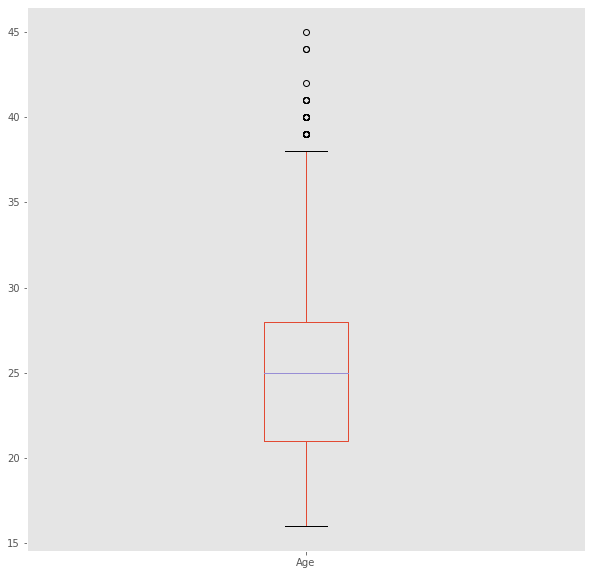

In [ ]:
#outlier identification using plots
df.boxplot( column =['Age'], grid = False, figsize=(10,10))

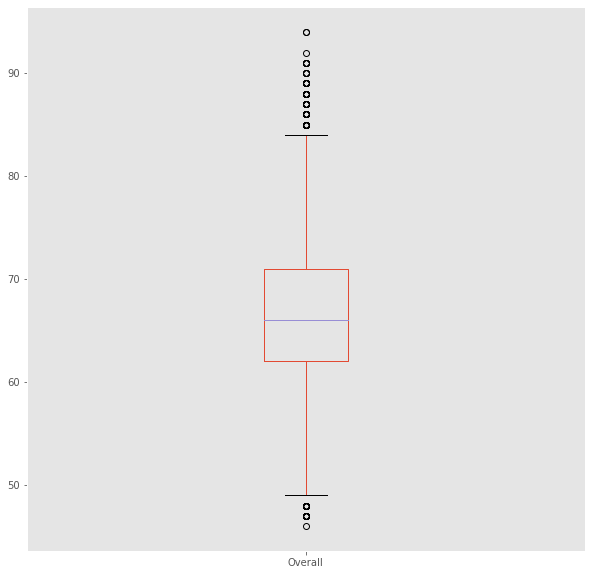

In [ ]:
df.boxplot( column =['Overall'], grid = False, figsize=(10,10))

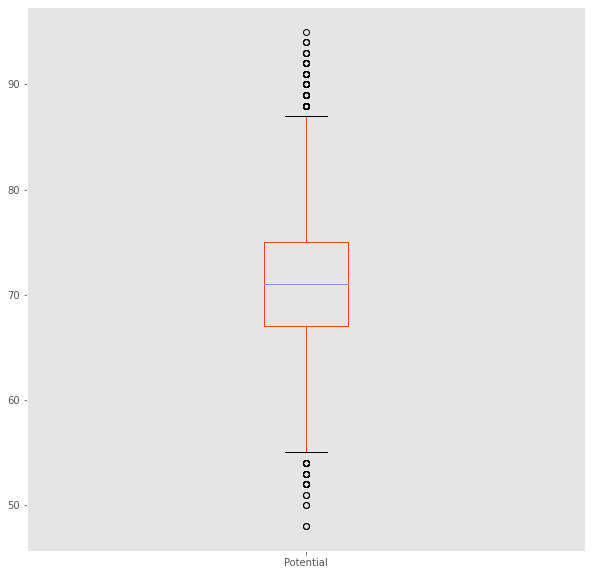

In [ ]:
df.boxplot( column =['Potential'], grid = False, figsize=(10,10))

In [ ]:
from collections import Counter

In [ ]:
def outlier_find(mnar):
    outlier_indices = []
    
    for col in mnar.columns.tolist():
        Q1 = np.percentile(mnar[col], 25)
        Q3 = np.percentile(mnar[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = mnar[(mnar[col] < Q1 - outlier_step) | (mnar[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 1)
    return multiple_outliers

In [ ]:
len(outlier_find(df[ar]))

3002

In [ ]:
pd1=df

In [ ]:
df=df.drop(outlier_find(df[ar]))

In [ ]:

df=df.reset_index()

In [ ]:
df

index      ID             Name  Age  \
0        542  147782       I. Denisov   34   
1        544  146748     Diego LÃ³pez   36   
2        547  142754    J. Mascherano   34   
3        567  230201  Maikel Catarino   34   
4        568  229909         A. Lunev   26   
...      ...     ...              ...  ...   
15200  18199  244677     M. Baldisimo   18   
15201  18201  243413         D. Walsh   18   
15202  18204  241638        B. Worman   16   
15203  18205  246268   D. Walker-Rice   17   
15204  18206  246269        G. Nugent   16   

                                                Photo          Nationality  \
0      https://cdn.sofifa.org/players/4/19/147782.png               Russia   
1      https://cdn.sofifa.org/players/4/19/146748.png                Spain   
2      https://cdn.sofifa.org/players/4/19/142754.png            Argentina   
3      https://cdn.sofifa.org/players/4/19/230201.png               Brazil   
4      https://cdn.sofifa.org/players/4/19/229909.png               Russia   
...                                               ...                  ...   
15200  https://cdn.sofifa.org/players/4/19/244677.png               Canada   
15201  https://cdn.sofifa.org/players/4/19/243413.png  Republic of Ireland   
15202  https://cdn.sofifa.org/players/4/19/241638.png              England   
15203  https://cdn.sofifa.org/players/4/19/246268.png              England   
15204  https://cdn.sofifa.org/players/4/19/246269.png              England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/40.png       80         80   
1      https://cdn.sofifa.org/flags/45.png       80         80   
2      https://cdn.sofifa.org/flags/52.png       80         80   
3      https://cdn.sofifa.org/flags/54.png       79         79   
4      https://cdn.sofifa.org/flags/40.png       79         81   
...                                    ...      ...        ...   
15200  https://cdn.sofifa.org/flags/70.png       47         69   
15201  https://cdn.sofifa.org/flags/25.png       47         68   
15202  https://cdn.sofifa.org/flags/14.png       47         67   
15203  https://cdn.sofifa.org/flags/14.png       47         66   
15204  https://cdn.sofifa.org/flags/14.png       46         66   

                         Club  ...    Marking  StandingTackle  SlidingTackle  \
0            Lokomotiv Moscow  ...  85.714286       86.813187      79.545455   
1                RCD Espanyol  ...  14.285714       12.087912      12.500000   
2      Hebei China Fortune FC  ...  82.417582       86.813187      89.772727   
3           AtlÃ©tico Mineiro  ...  83.516484       83.516484      82.954545   
4                   AS Monaco  ...  16.483516       19.780220      10.227273   
...                       ...  ...        ...             ...            ...   
15200  Vancouver Whitecaps FC  ...  49.450549       51.648352      52.272727   
15201            Waterford FC  ...  45.054945       49.450549      56.818182   
15202        Cambridge United  ...  31.868132       12.087912       9.090909   
15203         Tranmere Rovers  ...  18.681319       25.274725      27.272727   
15204         Tranmere Rovers  ...  40.659341       45.054945      53.409091   

        GKDiving GKHandling  GKKicking  GKPositioning  GKReflexes  \
0      13.483146   6.593407  15.555556      13.483146   11.827957   
1      83.146067  87.912088  81.111111      89.887640   80.645161   
2       5.617978   9.890110   7.777778       4.494382    4.301075   
3      15.730337  13.186813  12.222222      10.112360   15.053763   
4      88.764045  79.120879  71.111111      85.393258   90.322581   
...          ...        ...        ...            ...         ...   
15200   6.741573   6.593407   8.888889      14.606742   15.053763   
15201   8.988764   9.890110   8.888889      11.235955   12.903226   
15202   5.617978   4.395604  10.000000       5.617978   12.903226   
15203  14.606742   5.494505  14.444444       7.865169    8.602151   
1520

In [ ]:
df.shape

(15205, 90)

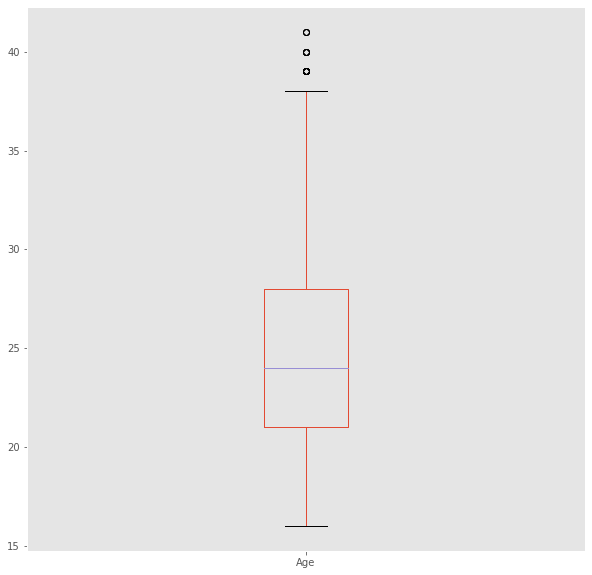

In [ ]:
df.boxplot(column =['Age'], grid = False, figsize=(10,10))

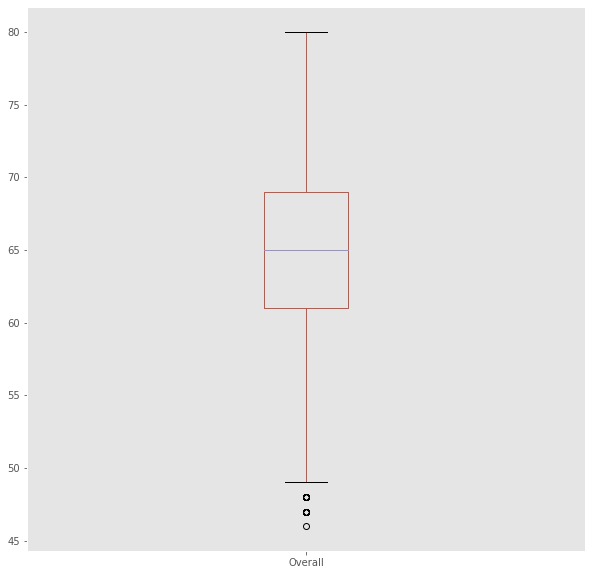

In [ ]:
df.boxplot(column =['Overall'], grid = False, figsize=(10,10))

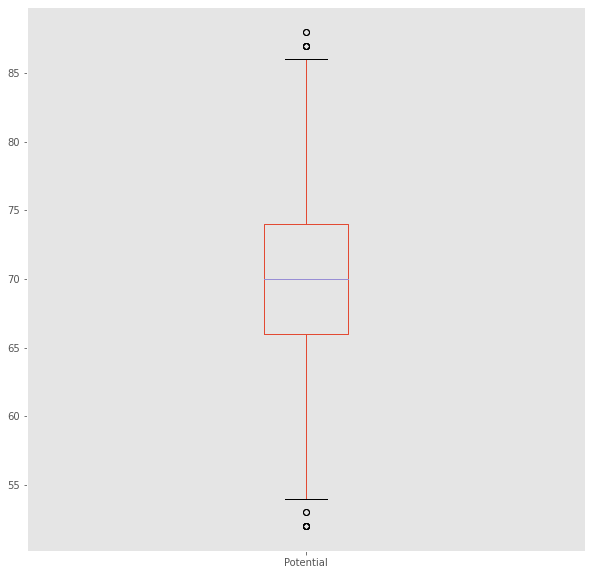

In [ ]:
df.boxplot(column =['Potential'], grid = False, figsize=(10,10))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in ['Photo','Flag','ClubLogo'] :
    df[i] = label_encoder.fit_transform(df[i])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in ['Position','Position (4)'] :
    df[i] = label_encoder.fit_transform(df[i])

In [ ]:
df['Flag']

0        108
1        112
2        120
3        122
4        108
        ... 
15200    136
15201     91
15202     40
15203     40
15204     40
Name: Flag, Length: 15205, dtype: int64

In [ ]:
ar.pop(3)
ar

['Age',
 'Overall',
 'Potential',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'ReleaseClause']

In [ ]:
df['ReleaseClause']

0        4.115535
1        1.835703
2        4.247064
3        2.975619
4        2.004525
           ...   
15200    0.071026
15201    0.061380
15202    0.066641
15203    0.056996
15204    0.066641
Name: ReleaseClause, Length: 15205, dtype: float64

REGRESSION

SIMPLE LINEAR REGRESSION

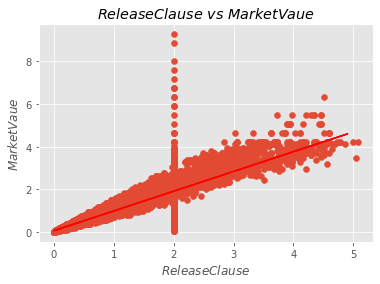

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x = np.array(df['ReleaseClause']).reshape(-1,1)
y = np.array(df['Value']).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , train_size=0.7)


model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
y_predict = model.predict(x_test.reshape(-1,1))
plt.xlabel("$Release Clause$")
plt.ylabel("$Market Vaue$")
plt.title("$Release Clause$ $vs$ $Market Vaue$")
plt.scatter(x_train, y_train)

plt.plot(x_test, y_predict, color = 'red')
plt.show()


In [ ]:
df['Overall']

0        80
1        80
2        80
3        79
4        79
         ..
15200    47
15201    47
15202    47
15203    47
15204    46
Name: Overall, Length: 15205, dtype: int64

In [ ]:
model.score(x_test,y_test)

0.781112844854464

In [ ]:
b1 = 183.72 #height
y_pred = model.predict([[b1]])
y_pred

array([[170.40452147]])

In [ ]:
#Calculation Intercept and Coefficient
print("Coefficient(b1) ",model.coef_)

Coefficient(b1)  [[0.92722393]]


In [ ]:
print("Intercept(b0) ",model.intercept_)

Intercept(b0)  [0.05494152]


In [ ]:
from sklearn import metrics

print("Mean Absolute Error",metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error",metrics.mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error 0.2053866581169826
Mean Squared Error 0.1906026024743716
Root Mean Squared Error 0.4365805795891196


MODEL 2


Estimated coefficients:
b_0 = 0.05423298313240654 		
b_1 = 0.9269054976604939


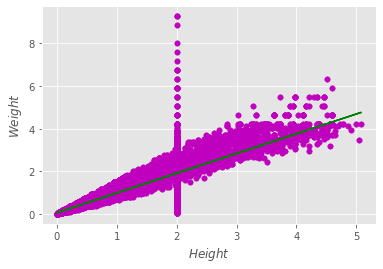

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):

	n = np.size(x)


	m_x = np.mean(x)
	m_y = np.mean(y)

	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

X = df['ReleaseClause'].replace(-1,1)
y = df['Value'].replace(-1,1)


b = estimate_coef(X, y)
print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

plt.scatter(X, y, color = "m",
			marker = "o", s = 30)

y_pred = b[0] + b[1]*X


plt.plot(X, y_pred, color = "g")


plt.xlabel('$Height$')
plt.ylabel('$Weight$')


plt.show()





In [ ]:
X = df['ReleaseClause'][0]	
c = b[0] + b[1]*X


In [ ]:
c

3.8689448722532496

In [ ]:
df['Value'][0]

3.789349312178243

MULTIPLE LINEAR REGRESSION

In [ ]:
ar

['Age',
 'Overall',
 'Potential',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'ReleaseClause']

In [ ]:
X=df[ar]
y=np.array(df['Value']).reshape(-1,1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=1)

Coefficients:  [[-2.03381476e-02  5.36150589e-02 -8.08411546e-03  9.40654828e-02
  -2.32536671e-05  2.11491445e-03  2.08811420e-04  1.41861618e-03
   6.73766148e-01]]
Variance score: 0.8422564581876124


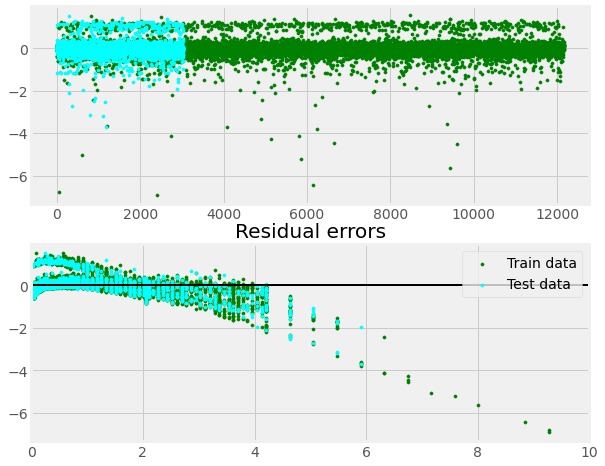

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics





reg = linear_model.LinearRegression()


reg.fit(X_train, y_train)


print('Coefficients: ', reg.coef_)


print('Variance score: {}'.format(reg.score(X_test, y_test)))

y_predict = reg.predict(X_test)

plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
a=list(k for k in range(len(y_train)))

plt.scatter(a, reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')
a=list(k for k in range(len(y_test)))
plt.scatter(a, reg.predict(X_test) - y_test,
			color = "cyan", s = 10, label = 'Test data')
plt.subplot(2,1,2)

plt.scatter(y_train, reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')
plt.scatter(y_test, reg.predict(X_test) - y_test,
			color = "cyan", s = 10, label = 'Test data')

plt.xlim([0, 10])


plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)


plt.legend(loc = 'upper right')


plt.title("Residual errors")


plt.show()


In [ ]:
#Calulating coefficient and intercept
print("Intercept(b0) ",reg.intercept_)

Intercept(b0)  [-2.20942631]


In [ ]:
print("Coefficients(b1[n]) ")
list(reg.coef_)

Coefficients(b1[n]) 


[array([-2.03381476e-02,  5.36150589e-02, -8.08411546e-03,  9.40654828e-02,
        -2.32536671e-05,  2.11491445e-03,  2.08811420e-04,  1.41861618e-03,
         6.73766148e-01])]

In [ ]:
from sklearn import metrics

print("Mean Absolute Error",metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error",metrics.mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error 0.21851196622434765
Mean Squared Error 0.14686760618770278
Root Mean Squared Error 0.3832330964148357


In [ ]:
reg.score(X_test,y_test)

0.8422564581876124

In [ ]:
df['Position (4)']

0        3
1        2
2        3
3        1
4        2
        ..
15200    3
15201    1
15202    0
15203    0
15204    3
Name: Position (4), Length: 15205, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
features =['Overall']
for i in features:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

***KNN***

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.552560353210743
RMSE value for k=  2 is: 0.5089044469231522
RMSE value for k=  3 is: 0.4954003252717094
RMSE value for k=  4 is: 0.5066741703695504
RMSE value for k=  5 is: 0.5140435241589263
RMSE value for k=  6 is: 0.5180702176134172
RMSE value for k=  7 is: 0.5224715640863593
RMSE value for k=  8 is: 0.5255092605383167
RMSE value for k=  9 is: 0.5291648842631472
RMSE value for k=  10 is: 0.5315436188997593
RMSE value for k=  11 is: 0.5351638133249735
RMSE value for k=  12 is: 0.5408958758235444
RMSE value for k=  13 is: 0.5434474446238584
RMSE value for k=  14 is: 0.5518983769249123
RMSE value for k=  15 is: 0.5567636126195556
RMSE value for k=  16 is: 0.5604788548156775
RMSE value for k=  17 is: 0.5639402074781922
RMSE value for k=  18 is: 0.5682965320214179
RMSE value for k=  19 is: 0.571897143970251
RMSE value for k=  20 is: 0.5754670845025414


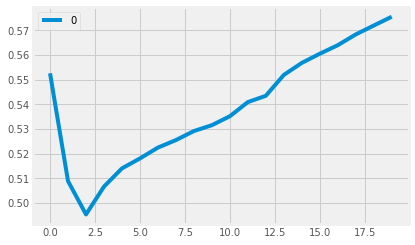

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)

model.fit(X_train, y_train)  
pred=model.predict(X_test)


In [ ]:
pred

array([[0.6456241 ],
       [0.2194278 ],
       [0.86716179],
       ...,
       [2.01704785],
       [0.55067938],
       [0.90935944]])

In [ ]:
print("Score :",model.score(X_test,y_test))

Score : 0.7218378316065386


In [ ]:
df=pd1
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                        ClubLogo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ...    Marking  StandingTackle  SlidingTackle    GKDiving  GKHandling  \
0      ...  32.967033       28.571429      26.136364    5.617978   10.989011   
1      ...  27.472527       31.868132      22.727273    6.741573   10.989011   
2      ...  26.373626       24.175824      34.090909    8.988764    8.791209   
3      ...  13.186813       20.879121      11.363636  100.000000   92.307692   
4      ...  71.428571       61.538462      54.545455   15.730337   13.186813   
...    ...        ...             ...            ...         ...         ...   
18202  ...  40.659341       50.549451      50.000000   10.112360   13.186813   
18203  ...  20.879121       14.285714      18.181818   10.112360    8.791209   
18204  ...  31.868132       12.087912       9.090909    5.617978    4.395604   
18205  ...  18.681319       25.274725      27.272727   14.606742    5.494505   
18206  ...  40.659341       45.054945      53.409091   10.112360   

In [ ]:
ar1=['Overall','Potential',
 'Value',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'ReleaseClause',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

In [ ]:
from collections import Counter

In [ ]:
def outlier_find(mnar):
    outlier_indices = []
    
    for col in mnar.columns.tolist():
        Q1 = np.percentile(mnar[col], 25)
        Q3 = np.percentile(mnar[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = mnar[(mnar[col] < Q1 - outlier_step) | (mnar[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 1)
    return multiple_outliers

In [ ]:
len(outlier_find(df[ar]))

2585

In [ ]:
df=df.drop(outlier_find(df[ar]))
df=df.reset_index()

In [ ]:
df

index      ID            Name  Age  \
0        237  221087      Pau LÃ³pez   23   
1        427  226226     G. Lo Celso   22   
2        431  221540           RaÃºl   28   
3        453  206413   T. Stepanenko   28   
4        462  204120      T. VaclÃ­k   29   
...      ...     ...             ...  ...   
15617  18199  244677    M. Baldisimo   18   
15618  18201  243413        D. Walsh   18   
15619  18204  241638       B. Worman   16   
15620  18205  246268  D. Walker-Rice   17   
15621  18206  246269       G. Nugent   16   

                                                Photo          Nationality  \
0      https://cdn.sofifa.org/players/4/19/221087.png                Spain   
1      https://cdn.sofifa.org/players/4/19/226226.png            Argentina   
2      https://cdn.sofifa.org/players/4/19/221540.png               Brazil   
3      https://cdn.sofifa.org/players/4/19/206413.png              Ukraine   
4      https://cdn.sofifa.org/players/4/19/204120.png       Czech Republic   
...                                               ...                  ...   
15617  https://cdn.sofifa.org/players/4/19/244677.png               Canada   
15618  https://cdn.sofifa.org/players/4/19/243413.png  Republic of Ireland   
15619  https://cdn.sofifa.org/players/4/19/241638.png              England   
15620  https://cdn.sofifa.org/players/4/19/246268.png              England   
15621  https://cdn.sofifa.org/players/4/19/246269.png              England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/45.png       82         87   
1      https://cdn.sofifa.org/flags/52.png       80         86   
2      https://cdn.sofifa.org/flags/54.png       80         80   
3      https://cdn.sofifa.org/flags/49.png       80         80   
4      https://cdn.sofifa.org/flags/12.png       80         81   
...                                    ...      ...        ...   
15617  https://cdn.sofifa.org/flags/70.png       47         69   
15618  https://cdn.sofifa.org/flags/25.png       47         68   
15619  https://cdn.sofifa.org/flags/14.png       47         67   
15620  https://cdn.sofifa.org/flags/14.png       47         66   
15621  https://cdn.sofifa.org/flags/14.png       46         66   

                         Club  ...    Marking  StandingTackle  SlidingTackle  \
0                  Real Betis  ...  17.582418       19.780220       9.090909   
1                  Real Betis  ...  63.736264       71.428571      72.727273   
2                    SC Braga  ...  82.417582       87.912088      82.954545   
3            Shakhtar Donetsk  ...  83.516484       84.615385      84.090909   
4                  Sevilla FC  ...  17.582418       17.582418      17.045455   
...                       ...  ...        ...             ...            ...   
15617  Vancouver Whitecaps FC  ...  49.450549       51.648352      52.272727   
15618            Waterford FC  ...  45.054945       49.450549      56.818182   
15619        Cambridge United  ...  31.868132       12.087912       9.090909   
15620         Tranmere Rovers  ...  18.681319       25.274725      27.272727   
15621         Tranmere Rovers  ...  40.659341       45.054945      53.409091   

        GKDiving GKHandling  GKKicking  GKPositioning  GKReflexes  \
0      89.887640  89.010989  86.666667      92.134831   86.021505   
1      10.112360   6.593407  10.000000      15.730337   13.978495   
2      10.112360   8.791209   6.666667      13.483146   11.827957   
3      15.730337  13.186813   8.888889      14.606742    8.602151   
4      91.011236  78.021978  81.111111      89.887640   90.322581   
...          ...        ...        ...            ...         ...   
15617   6.741573   6.593407   8.888889      14.606742   15.053763   
15618   8.988764   9.890110   8.888889      11.235955   12.903226   
15619   5.617978   4.395604  10.000000       5.617978   12.903226   
15620  14.606742   5.494505  14.444444       7.865169    8.602151   
15621  10.112360

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in ['Position','Position (4)'] :
    df[i] = label_encoder.fit_transform(df[i])

In [ ]:
ar1[0]

'Overall'

In [ ]:
x = df[ar1]
y=df['Position (4)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
#Libraries
from sklearn.tree import DecisionTreeClassifier
from lightgbm import *
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans 
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#Decision Tree

In [ ]:
from sklearn import tree
dc = tree.DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_preddt = dc.predict(x_test)
DT_preds = pd.DataFrame({"Predicted":y_preddt,"Actual":y_test})
DT_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           3       3
11080          3       3
...          ...     ...
1295           3       3
2694           1       1
9776           1       1
5344           1       1
579            0       0

[4687 rows x 2 columns]

In [ ]:
import math

DT_TP3 = len(DT_preds[(DT_preds["Predicted"]==DT_preds["Actual"])&(DT_preds["Predicted"]==1)])
DT_FP3 = len(DT_preds[(DT_preds["Predicted"]!=DT_preds["Actual"])&(DT_preds["Predicted"]==1)])
DT_FN3 = len(DT_preds[(DT_preds["Predicted"]!=DT_preds["Actual"])&(DT_preds["Predicted"]==0)])
DT_TN3 = len(DT_preds[(DT_preds["Predicted"]==DT_preds["Actual"])&(DT_preds["Predicted"]==0)])
print(DT_TP3,DT_FP3,DT_FN3,DT_TN3)
print("Rightly Classified: ",(DT_TP3+DT_TN3),"/",(DT_TP3+DT_FP3+DT_FN3+DT_TN3))
print("Wrongly Classified: ",(DT_FP3+DT_FN3),"/",(DT_TP3+DT_FP3+DT_FN3+DT_TN3))

DT_Accuracy3 = (DT_TP3+DT_TN3)/(DT_TP3+DT_FP3+DT_FN3+DT_TN3)
DT_Precision3 = (DT_TP3)/(DT_TP3+DT_FP3)
DT_Recall3 = (DT_TP3)/(DT_TP3+DT_FN3)
DT_Specificity3 = (DT_TN3)/(DT_TN3+DT_FP3)
DT_F13 = (2*DT_Precision3*DT_Recall3)/(DT_Precision3+DT_Recall3)

1354 220 233 667
Rightly Classified:  2021 / 2474
Wrongly Classified:  453 / 2474


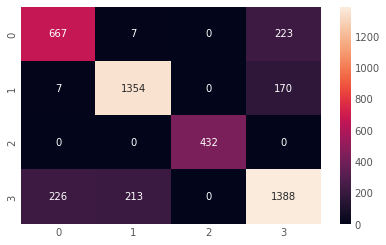

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dt_Confusion_matrix = confusion_matrix(y_test, y_preddt)
sns.heatmap(dt_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       897
           1       0.86      0.88      0.87      1531
           2       1.00      1.00      1.00       432
           3       0.78      0.76      0.77      1827

    accuracy                           0.82      4687
   macro avg       0.85      0.85      0.85      4687
weighted avg       0.82      0.82      0.82      4687



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of Decision tree:",accuracy_score(y_test,y_preddt))

Accuracy of Decision tree: 0.8212075954768508


In [ ]:
f=x.columns[:].tolist()
f

['Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Special',
 'InternationalReputation',
 'WeakFoot',
 'SkillMoves',
 'ReleaseClause',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

[Text(0.3924036612193329, 0.9791666666666666, 'SkillMoves <= 12.5\ngini = 0.7\nsamples = 10643\nvalue = [1991, 3603, 1063, 3986]'),
 Text(0.3915558443477771, 0.9375, 'gini = 0.0\nsamples = 1063\nvalue = [0, 0, 1063, 0]'),
 Text(0.3932514780908886, 0.9375, 'RCB <= 51.5\ngini = 0.642\nsamples = 9580\nvalue = [1991, 3603, 0, 3986]'),
 Text(0.1342593876675763, 0.8958333333333334, 'LWB <= 45.5\ngini = 0.532\nsamples = 3701\nvalue = [1848, 125, 0, 1728]'),
 Text(0.029503033594743537, 0.8541666666666666, 'LS <= 49.5\ngini = 0.335\nsamples = 1073\nvalue = [854, 32, 0, 187]'),
 Text(0.005404832556167868, 0.8125, 'RS <= 39.5\ngini = 0.625\nsamples = 128\nvalue = [33, 31, 0, 64]'),
 Text(0.004557015684612124, 0.7708333333333334, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0, 0]'),
 Text(0.006252649427723612, 0.7708333333333334, 'LB <= 37.5\ngini = 0.449\nsamples = 97\nvalue = [33, 0, 0, 64]'),
 Text(0.002543450614667232, 0.7291666666666666, 'Age <= 22.5\ngini = 0.147\nsamples = 25\nvalue = [23, 0,

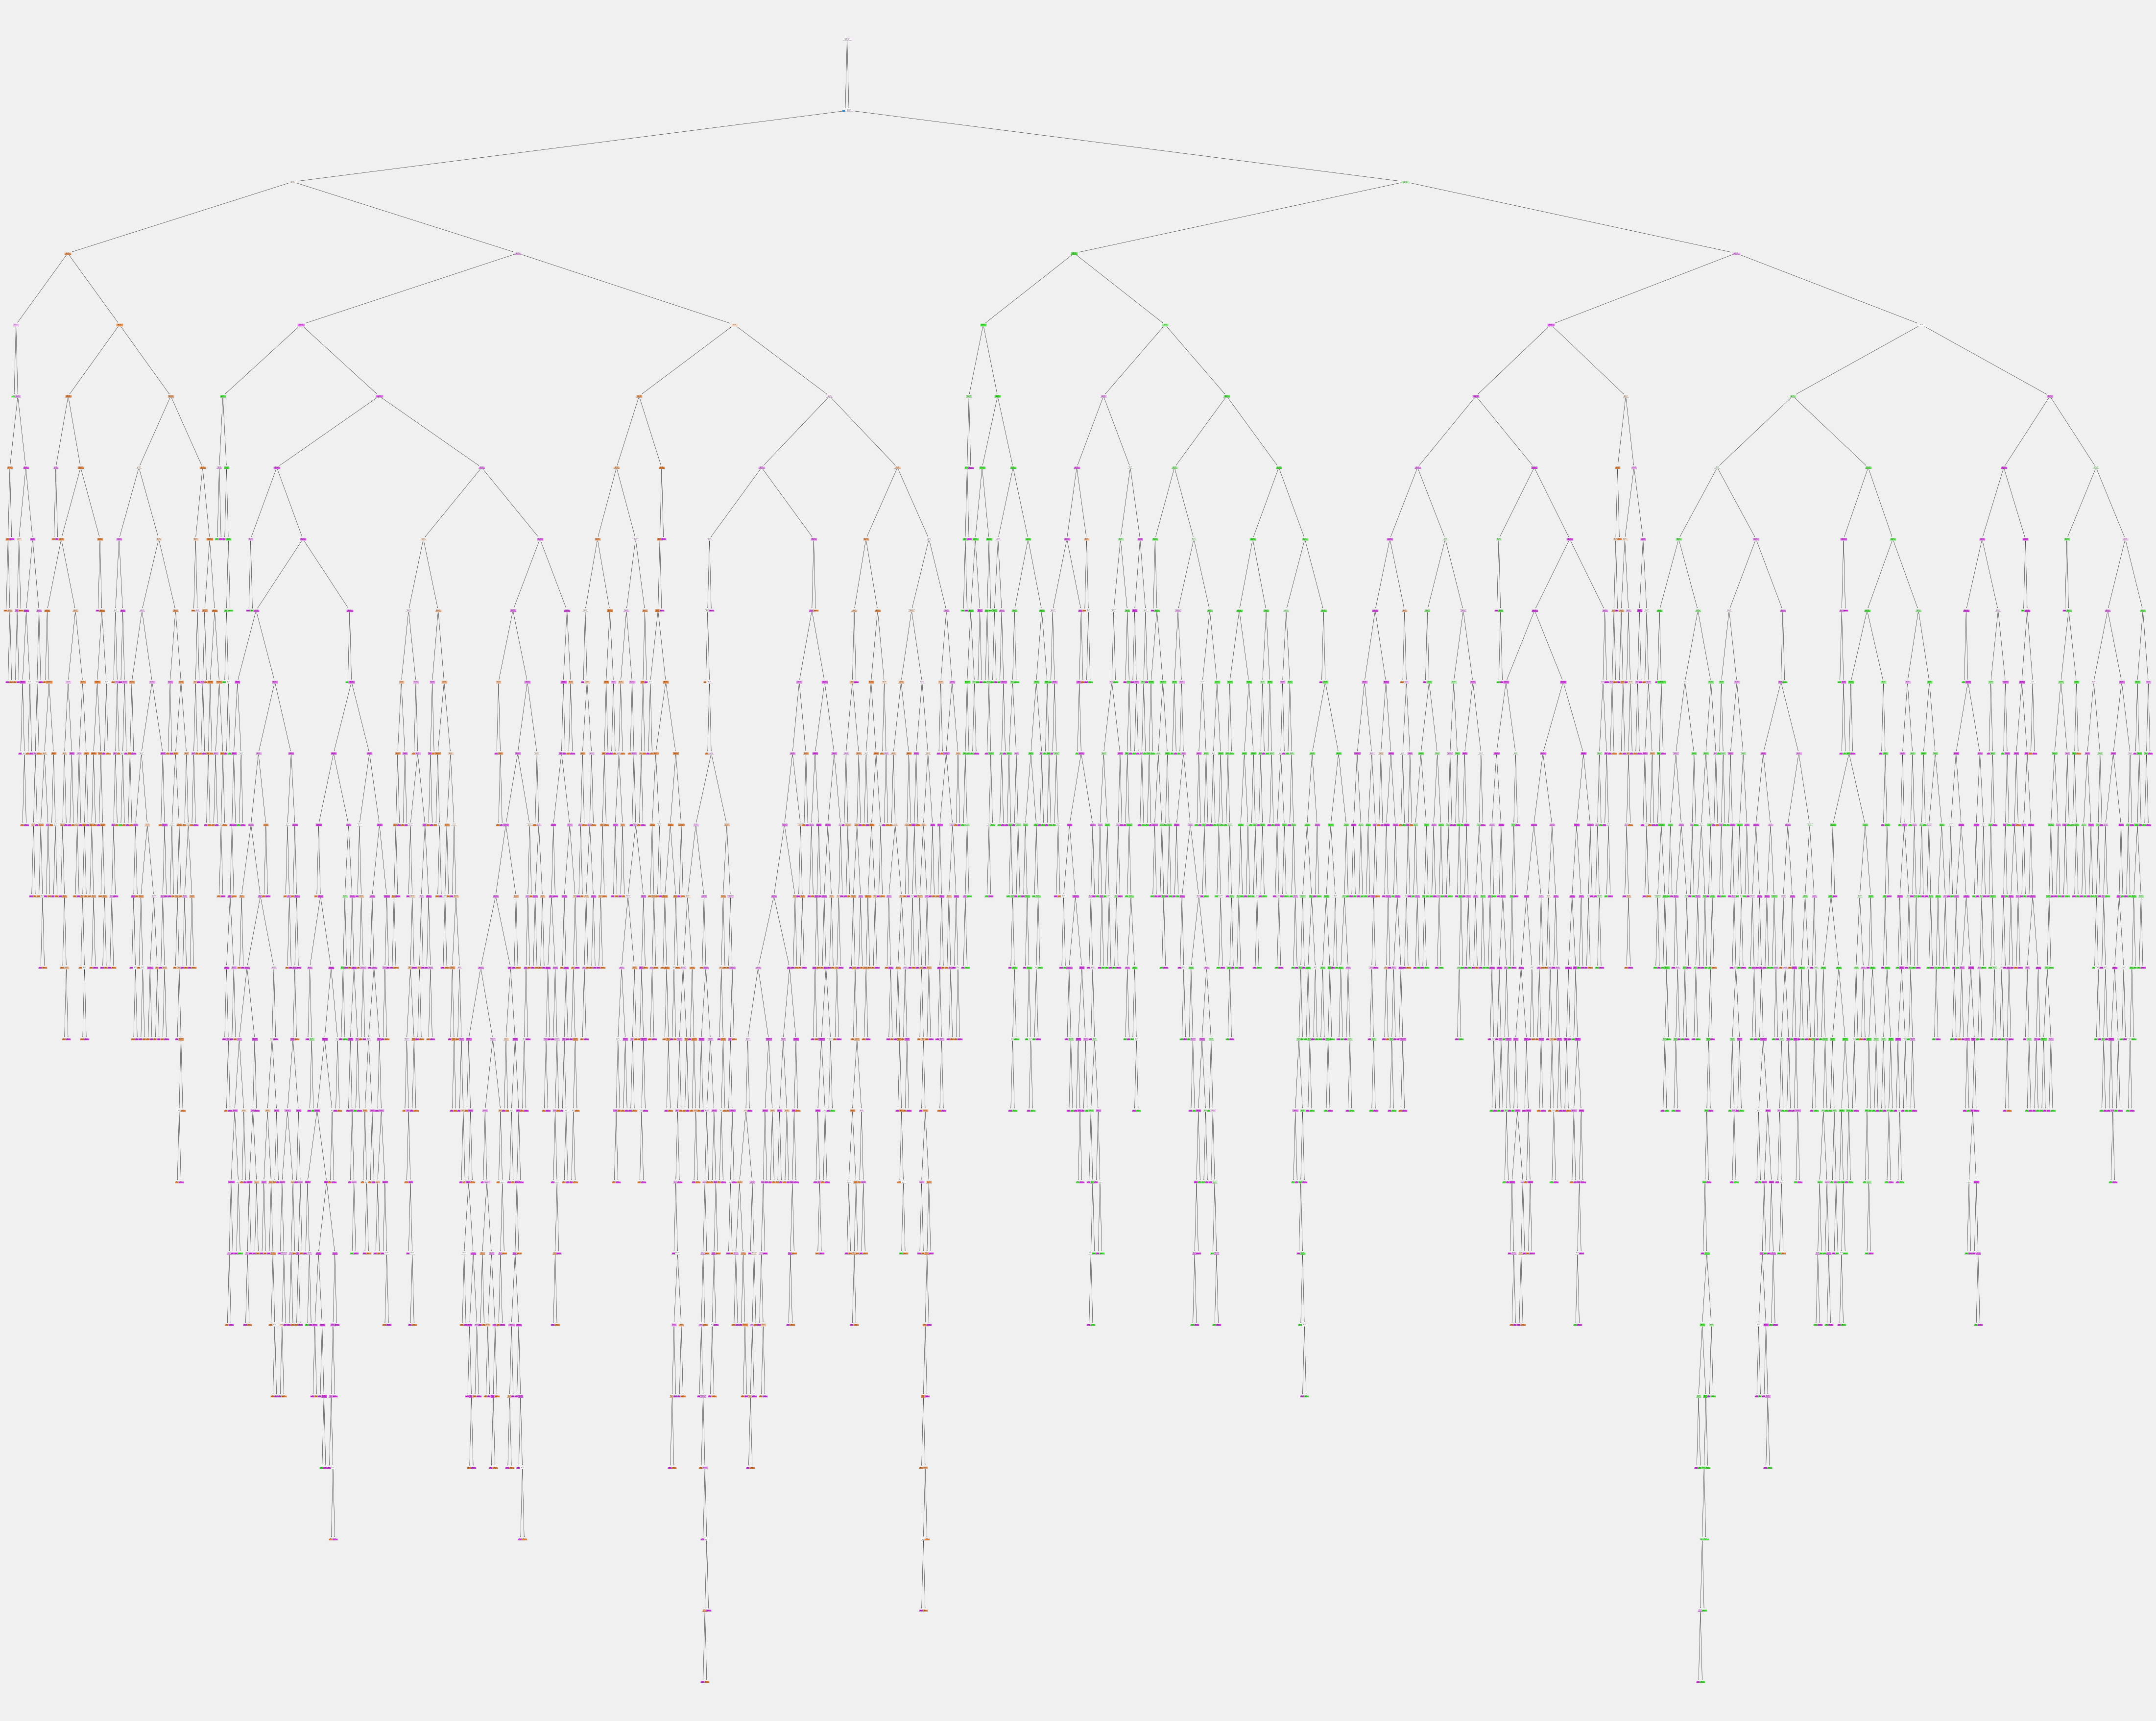

In [ ]:
plt.figure(figsize=(70,60))
tree.plot_tree(dc,filled=True,feature_names=f,proportion=False)

***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predk = knn.predict(x_test)
KNN_preds = pd.DataFrame({"Predicted":y_predk,"Actual":y_test})
KNN_preds

Predicted  Actual
13259          1       1
13716          2       2
3272           1       1
6599           1       1
15574          3       3
...          ...     ...
2317           3       3
15094          3       3
637            0       0
12430          3       3
8382           1       1

[4687 rows x 2 columns]

In [ ]:
KNN_TP = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP,KNN_FP,KNN_FN,KNN_TN)
print("Rightly Classified: ",(KNN_TP+KNN_TN),"/",(KNN_TP+KNN_FP+KNN_FN+KNN_TN))
print("Wrongly Classified: ",(KNN_FP+KNN_FN),"/",(KNN_TP+KNN_FP+KNN_FN+KNN_TN))

KNN_Accuracy = (KNN_TP+KNN_TN)/(KNN_TP+KNN_FP+KNN_FN+KNN_TN)
KNN_Precision = (KNN_TP)/(KNN_TP+KNN_FP)
KNN_Recall = (KNN_TP)/(KNN_TP+KNN_FN)
KNN_Specificity = (KNN_TN)/(KNN_TN+KNN_FP)
KNN_F1 = (2*KNN_Precision*KNN_Recall)/(KNN_Precision+KNN_Recall)


1321 232 179 646
Rightly Classified:  1967 / 2378
Wrongly Classified:  411 / 2378


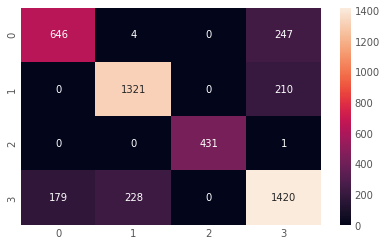

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

KNN_Confusion_matrix = confusion_matrix(y_test,y_predk)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       897
           1       0.85      0.86      0.86      1531
           2       1.00      1.00      1.00       432
           3       0.76      0.78      0.77      1827

    accuracy                           0.81      4687
   macro avg       0.85      0.84      0.84      4687
weighted avg       0.81      0.81      0.81      4687



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in np.arange(5,30):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  knn_pred =knn.predict(x_test)
  print("Accuracy score of knn for k= ",i," : ",accuracy_score(y_test,knn_pred))

Accuracy score of knn for k=  5  :  0.8145935566460423
Accuracy score of knn for k=  6  :  0.8098997226370813
Accuracy score of knn for k=  7  :  0.8222743759334329
Accuracy score of knn for k=  8  :  0.819714102837636
Accuracy score of knn for k=  9  :  0.8261147855771283
Accuracy score of knn for k=  10  :  0.8218476637508001
Accuracy score of knn for k=  11  :  0.8252613612118626
Accuracy score of knn for k=  12  :  0.820780883294218
Accuracy score of knn for k=  13  :  0.8237678685726477
Accuracy score of knn for k=  14  :  0.8199274589289525
Accuracy score of knn for k=  15  :  0.8261147855771283
Accuracy score of knn for k=  16  :  0.8231278002986985
Accuracy score of knn for k=  17  :  0.8199274589289525
Accuracy score of knn for k=  18  :  0.819714102837636
Accuracy score of knn for k=  19  :  0.8158736931939407
Accuracy score of knn for k=  20  :  0.8165137614678899
Accuracy score of knn for k=  21  :  0.8173671858331555
Accuracy score of knn for k=  22  :  0.8163004053765734


From above results we can say that best K value is 28

Test Size is 20 percent:

In [ ]:
x = df[ar1]
y=df['Position (4)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in np.arange(5,30):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  knn_pred =knn.predict(x_test)
  print("Accuracy score of knn for k= ",i," : ",accuracy_score(y_test,knn_pred))

Accuracy score of knn for k=  5  :  0.824
Accuracy score of knn for k=  6  :  0.82272
Accuracy score of knn for k=  7  :  0.82912
Accuracy score of knn for k=  8  :  0.8256
Accuracy score of knn for k=  9  :  0.82496
Accuracy score of knn for k=  10  :  0.8288
Accuracy score of knn for k=  11  :  0.82528
Accuracy score of knn for k=  12  :  0.8272
Accuracy score of knn for k=  13  :  0.82976
Accuracy score of knn for k=  14  :  0.83008
Accuracy score of knn for k=  15  :  0.83104
Accuracy score of knn for k=  16  :  0.83296
Accuracy score of knn for k=  17  :  0.8304
Accuracy score of knn for k=  18  :  0.82848
Accuracy score of knn for k=  19  :  0.82592
Accuracy score of knn for k=  20  :  0.8272
Accuracy score of knn for k=  21  :  0.82496
Accuracy score of knn for k=  22  :  0.8272
Accuracy score of knn for k=  23  :  0.82656
Accuracy score of knn for k=  24  :  0.82784
Accuracy score of knn for k=  25  :  0.82592
Accuracy score of knn for k=  26  :  0.82656
Accuracy score of knn f

Test size is 25 percfent:

In [ ]:
x = df[ar1]
y=df['Position (4)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in np.arange(5,30):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  knn_pred =knn.predict(x_test)
  print("Accuracy score of knn for k= ",i," : ",accuracy_score(y_test,knn_pred))

Accuracy score of knn for k=  5  :  0.8128520225294419
Accuracy score of knn for k=  6  :  0.8082437275985663
Accuracy score of knn for k=  7  :  0.8138760880696364
Accuracy score of knn for k=  8  :  0.8123399897593446
Accuracy score of knn for k=  9  :  0.8187403993855606
Accuracy score of knn for k=  10  :  0.8146441372247823
Accuracy score of knn for k=  11  :  0.8172043010752689
Accuracy score of knn for k=  12  :  0.8146441372247823
Accuracy score of knn for k=  13  :  0.815668202764977
Accuracy score of knn for k=  14  :  0.8108038914490527
Accuracy score of knn for k=  15  :  0.8133640552995391
Accuracy score of knn for k=  16  :  0.8092677931387608
Accuracy score of knn for k=  17  :  0.8166922683051715
Accuracy score of knn for k=  18  :  0.8174603174603174
Accuracy score of knn for k=  19  :  0.8187403993855606
Accuracy score of knn for k=  20  :  0.8172043010752689
Accuracy score of knn for k=  21  :  0.8207885304659498
Accuracy score of knn for k=  22  :  0.817972350230414

# **But when we change the test size the best knn value also changes,so it is not reliable to choose the best knn value according to their accuracy**

In [ ]:
x = df[ar1]
y=df['Position (4)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predk = knn.predict(x_test)
KNN_preds = pd.DataFrame({"Predicted":y_predk,"Actual":y_test})
KNN_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           3       3
11080          3       3
...          ...     ...
1295           0       3
2694           1       1
9776           1       1
5344           3       1
579            0       0

[4687 rows x 2 columns]

#LGBM (Light Gradient Boosting Machine) Classifier

In [ ]:
from lightgbm import *

LGBM_model = LGBMClassifier()
LGBM_model.fit(x_train, y_train)
LGBM_y_preds = LGBM_model.predict(x_test)
LGBM_preds = pd.DataFrame({"Predicted":LGBM_y_preds,"Actual":y_test})
LGBM_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           3       3
11080          3       3
...          ...     ...
1295           3       3
2694           1       1
9776           1       1
5344           3       1
579            0       0

[4687 rows x 2 columns]

In [ ]:
LGBM_TP = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FP = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FN = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
LGBM_TN = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
print(LGBM_TP,LGBM_FP,LGBM_FN,LGBM_TN)
print("Rightly Classified: ",(LGBM_TP+LGBM_TN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))
print("Wrongly Classified: ",(LGBM_FP+LGBM_FN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))

LGBM_Accuracy = (LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_TN+LGBM_FP+LGBM_FN)
LGBM_Precision = (LGBM_TP)/(LGBM_TP+LGBM_FP)
LGBM_Recall = (LGBM_TP)/(LGBM_TP+LGBM_FN)
LGBM_Specificity = (LGBM_TN)/(LGBM_TN+LGBM_FP)
LGBM_F1 = (2*LGBM_Precision*LGBM_Recall)/(LGBM_Precision+LGBM_Recall)

1466 136 130 671
Rightly Classified:  2137 / 2403
Wrongly Classified:  266 / 2403


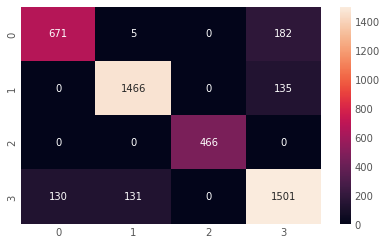

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

LGBM_Confusion_matrix = confusion_matrix(y_test, LGBM_y_preds)
sns.heatmap(LGBM_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, LGBM_y_preds))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       858
           1       0.92      0.92      0.92      1601
           2       1.00      1.00      1.00       466
           3       0.83      0.85      0.84      1762

    accuracy                           0.88      4687
   macro avg       0.89      0.89      0.89      4687
weighted avg       0.88      0.88      0.88      4687



#XGBoost


In [ ]:
#from xgboost import XGBClassifier()

XGB_model = xgb.XGBClassifier()
XGB_model.fit(x_train, y_train)
XGB_pred =XGB_model.predict(x_test)
XGB_pred

array([0, 0, 0, ..., 1, 3, 0])

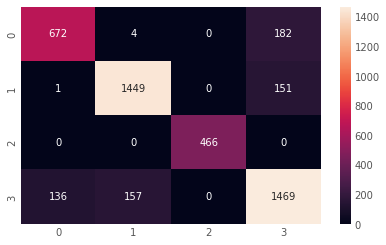

In [ ]:
XGB_Confusion_matrix = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       858
           1       0.90      0.91      0.90      1601
           2       1.00      1.00      1.00       466
           3       0.82      0.83      0.82      1762

    accuracy                           0.87      4687
   macro avg       0.89      0.88      0.88      4687
weighted avg       0.87      0.87      0.87      4687



#SVM

In [ ]:
SVM_model = SVC()
SVM_model.fit(x_train, y_train)
SVM_pred=SVM_model.predict(x_test)
SVM_pred

array([0, 0, 0, ..., 1, 3, 3])

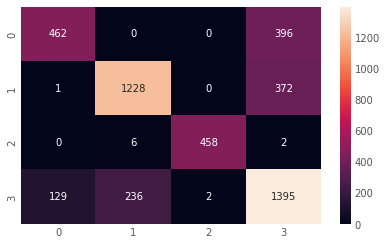

In [ ]:
SVM_Confusion_matrix = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       858
           1       0.84      0.77      0.80      1601
           2       1.00      0.98      0.99       466
           3       0.64      0.79      0.71      1762

    accuracy                           0.76      4687
   macro avg       0.81      0.77      0.78      4687
weighted avg       0.77      0.76      0.76      4687



#Random Forest (Max 5 features in Bootstraping)

In [ ]:
RF_model2 = RandomForestClassifier(max_depth=5)
RF_model2.fit(x_train,y_train)
RF_y_preds = RF_model2.predict(x_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           3       3
11080          3       3
...          ...     ...
1295           3       3
2694           1       1
9776           1       1
5344           3       1
579            3       0

[4687 rows x 2 columns]

In [ ]:
import math

RF_TP2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP2,RF_FP2,RF_FN2,RF_TN2)
print("Rightly Classified: ",(RF_TP2+RF_TN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
print("Wrongly Classified: ",(RF_FP2+RF_FN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))

RF_Accuracy2 = (RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2)
RF_Precision2 = (RF_TP2)/(RF_TP2+RF_FP2)
RF_Recall2 = (RF_TP2)/(RF_TP2+RF_FN2)
RF_Specificity2 = (RF_TN2)/(RF_TN2+RF_FP2)
RF_F12 = (2*RF_Precision2*RF_Recall2)/(RF_Precision2+RF_Recall2)

1362 182 168 650
Rightly Classified:  2012 / 2362
Wrongly Classified:  350 / 2362


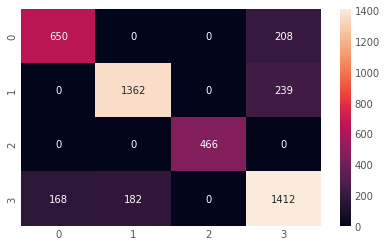

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       858
           1       0.88      0.85      0.87      1601
           2       1.00      1.00      1.00       466
           3       0.76      0.80      0.78      1762

    accuracy                           0.83      4687
   macro avg       0.86      0.85      0.86      4687
weighted avg       0.83      0.83      0.83      4687



#Random Forest (Max 10 features in Bootstraping)

In [ ]:
RF_model3 = RandomForestClassifier(max_depth=10)
RF_model3.fit(x_train,y_train)
RF_y_preds = RF_model3.predict(x_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           3       3
11080          3       3
...          ...     ...
1295           3       3
2694           1       1
9776           1       1
5344           3       1
579            0       0

[4687 rows x 2 columns]

In [ ]:
import math

RF_TP3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP3,RF_FP3,RF_FN3,RF_TN3)
print("Rightly Classified: ",(RF_TP3+RF_TN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))
print("Wrongly Classified: ",(RF_FP3+RF_FN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))

RF_Accuracy3 = (RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3)
RF_Precision3 = (RF_TP3)/(RF_TP3+RF_FP3)
RF_Recall3 = (RF_TP3)/(RF_TP3+RF_FN3)
RF_Specificity3 = (RF_TN3)/(RF_TN3+RF_FP3)
RF_F13 = (2*RF_Precision3*RF_Recall3)/(RF_Precision3+RF_Recall3)

1460 152 119 668
Rightly Classified:  2128 / 2399
Wrongly Classified:  271 / 2399


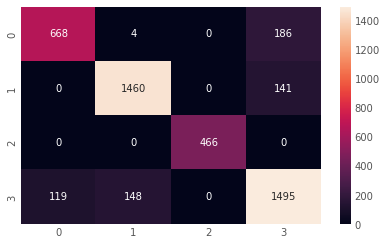

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       858
           1       0.91      0.91      0.91      1601
           2       1.00      1.00      1.00       466
           3       0.82      0.85      0.83      1762

    accuracy                           0.87      4687
   macro avg       0.89      0.88      0.89      4687
weighted avg       0.87      0.87      0.87      4687



#Gaussian Naive Bayes

In [ ]:
GNB_model = GaussianNB()
GNB_model.fit(x_train,y_train)
GNB_y_preds = GNB_model.predict(x_test)
GNB_preds = pd.DataFrame({"Predicted":GNB_y_preds,"Actual":y_test})
GNB_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           3       3
11080          1       3
...          ...     ...
1295           3       3
2694           3       1
9776           1       1
5344           3       1
579            3       0

[4687 rows x 2 columns]

In [ ]:
GNB_TP = len(GNB_preds[(GNB_preds["Predicted"]==GNB_preds["Actual"])&(GNB_preds["Predicted"]==1)])
GNB_FP = len(GNB_preds[(GNB_preds["Predicted"]!=GNB_preds["Actual"])&(GNB_preds["Predicted"]==1)])
GNB_FN = len(GNB_preds[(GNB_preds["Predicted"]!=GNB_preds["Actual"])&(GNB_preds["Predicted"]==0)])
GNB_TN = len(GNB_preds[(GNB_preds["Predicted"]==GNB_preds["Actual"])&(GNB_preds["Predicted"]==0)])
print(GNB_TP,GNB_FP,GNB_FN,GNB_TN)
print("Rightly Classified: ",(GNB_TP+GNB_TN),"/",(GNB_TP+GNB_FP+GNB_FN+GNB_TN))
print("Wrongly Classified: ",(GNB_FP+GNB_FN),"/",(GNB_TP+GNB_FP+GNB_FN+GNB_TN))

GNB_Accuracy = (GNB_TP+GNB_TN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN)
GNB_Precision = (GNB_TP)/(GNB_TP+GNB_FP)
GNB_Recall = (GNB_TP)/(GNB_TP+GNB_FN)
GNB_Specificity = (GNB_TN)/(GNB_TN+GNB_FP)
GNB_F1 = (2*GNB_Precision*GNB_Recall)/(GNB_Precision+GNB_Recall)

1152 234 458 719
Rightly Classified:  1871 / 2563
Wrongly Classified:  692 / 2563


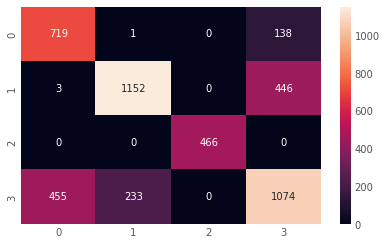

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

GNB_Confusion_matrix = confusion_matrix(y_test, GNB_y_preds)
sns.heatmap(GNB_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, GNB_y_preds))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71       858
           1       0.83      0.72      0.77      1601
           2       1.00      1.00      1.00       466
           3       0.65      0.61      0.63      1762

    accuracy                           0.73      4687
   macro avg       0.77      0.79      0.78      4687
weighted avg       0.74      0.73      0.73      4687



#

#Unsupervised machine learning models

#K-Means

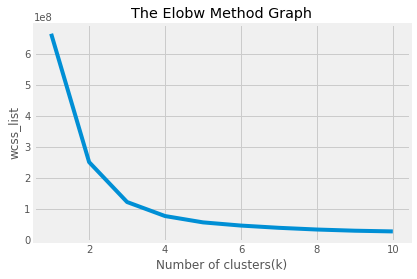

In [ ]:
# finding optimal number of clusters using the elbow method  
wcss_list= []      
# Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [ ]:
# training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
kmeans.fit(x_train)
km_pred= kmeans.predict(x_test)  
km_pred

array([0, 0, 0, ..., 3, 1, 1], dtype=int32)

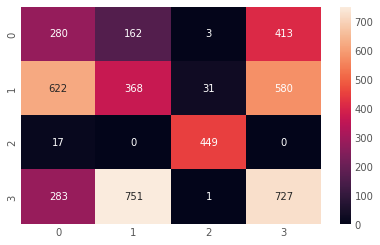

In [ ]:
Kmeans_Confusion_matrix = confusion_matrix(y_test, km_pred)
sns.heatmap(Kmeans_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, km_pred))

              precision    recall  f1-score   support

           0       0.23      0.33      0.27       858
           1       0.29      0.23      0.26      1601
           2       0.93      0.96      0.95       466
           3       0.42      0.41      0.42      1762

    accuracy                           0.39      4687
   macro avg       0.47      0.48      0.47      4687
weighted avg       0.39      0.39      0.39      4687



#Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Acluster = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
Acluster.fit(x_train)
Acluster_y_preds = Acluster.fit_predict(x_test)
Acluster_preds = pd.DataFrame({"Predicted":Acluster_y_preds,"Actual":y_test})
Acluster_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           1       3
11080          1       3
...          ...     ...
1295           1       3
2694           1       1
9776           1       1
5344           1       1
579            1       0

[4687 rows x 2 columns]

In [ ]:
Acluster_TP = len(Acluster_preds[(Acluster_preds["Predicted"]==Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==1)])
Acluster_FP = len(Acluster_preds[(Acluster_preds["Predicted"]!=Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==1)])
Acluster_FN = len(Acluster_preds[(Acluster_preds["Predicted"]!=Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==0)])
Acluster_TN = len(Acluster_preds[(Acluster_preds["Predicted"]==Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==0)])
print(Acluster_TP,Acluster_FP,Acluster_FN,Acluster_TN)
print("Rightly Classified: ",(Acluster_TP+Acluster_TN),"/",(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN))
print("Wrongly Classified: ",(Acluster_FP+Acluster_FN),"/",(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN))

Acluster_Accuracy = (Acluster_TP+Acluster_TN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)
Acluster_Precision = (Acluster_TP)/(Acluster_TP+Acluster_FP)
Acluster_Recall = (Acluster_TP)/(Acluster_TP+Acluster_FN)
Acluster_Specificity = (Acluster_TN)/(Acluster_TN+Acluster_FP)
Acluster_F1 = (2*Acluster_Precision*Acluster_Recall)/(Acluster_Precision+Acluster_Recall)

875 1916 1546 350
Rightly Classified:  1225 / 4687
Wrongly Classified:  3462 / 4687


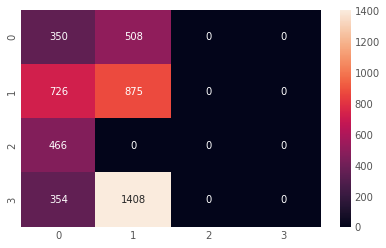

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Acluster_Confusion_matrix = confusion_matrix(y_test, Acluster_y_preds)
sns.heatmap(Acluster_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Acluster_y_preds))

              precision    recall  f1-score   support

           0       0.18      0.41      0.25       858
           1       0.31      0.55      0.40      1601
           2       0.00      0.00      0.00       466
           3       0.00      0.00      0.00      1762

    accuracy                           0.26      4687
   macro avg       0.12      0.24      0.16      4687
weighted avg       0.14      0.26      0.18      4687



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



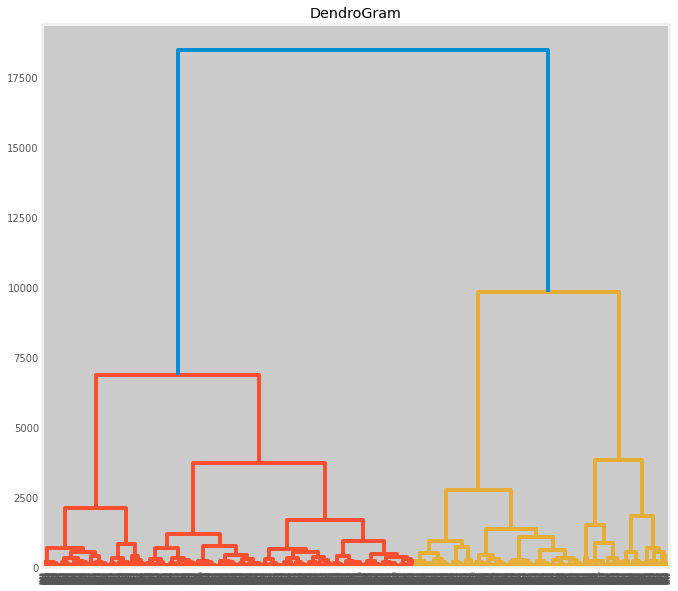

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))
plt.title("DendroGram")
dendo = shc.dendrogram(shc.linkage(x_test,method="ward"))

# Birch Clustering

In [ ]:
Birch_model = Birch(n_clusters=2)
Birch_model.fit(x_train)
Birch_y_preds = Birch_model.fit_predict(x_test)
Birch_preds = pd.DataFrame({"Predicted":Birch_y_preds,"Actual":y_test})
Birch_preds

Predicted  Actual
9045           0       0
13178          0       0
14253          0       0
7454           1       3
11080          1       3
...          ...     ...
1295           1       3
2694           1       1
9776           1       1
5344           1       1
579            1       0

[4687 rows x 2 columns]

In [ ]:
Birch_TP = len(Birch_preds[(Birch_preds["Predicted"]==Birch_preds["Actual"])&(Birch_preds["Predicted"]==1)])
Birch_FP = len(Birch_preds[(Birch_preds["Predicted"]!=Birch_preds["Actual"])&(Birch_preds["Predicted"]==1)])
Birch_FN = len(Birch_preds[(Birch_preds["Predicted"]!=Birch_preds["Actual"])&(Birch_preds["Predicted"]==0)])
Birch_TN = len(Birch_preds[(Birch_preds["Predicted"]==Birch_preds["Actual"])&(Birch_preds["Predicted"]==0)])
print(Birch_TP,Birch_FP,Birch_FN,Birch_TN)
print("Rightly Classified: ",(Birch_TP+Birch_TN),"/",(Birch_TP+Birch_FP+Birch_FN+Birch_TN))
print("Wrongly Classified: ",(Birch_FP+Birch_FN),"/",(Birch_TP+Birch_FP+Birch_FN+Birch_TN))

Birch_Accuracy = (Birch_TP+Birch_TN)/(Birch_TP+Birch_FP+Birch_FN+Birch_TN)
Birch_Precision = (Birch_TP)/(Birch_TP+Birch_FP)
Birch_Recall = (Birch_TP)/(Birch_TP+Birch_FN)
Birch_Specificity = (Birch_TN)/(Birch_TN+Birch_FP)
Birch_F1 = (2*Birch_Precision*Birch_Recall)/(Birch_Precision+Birch_Recall)

875 1916 1546 350
Rightly Classified:  1225 / 4687
Wrongly Classified:  3462 / 4687


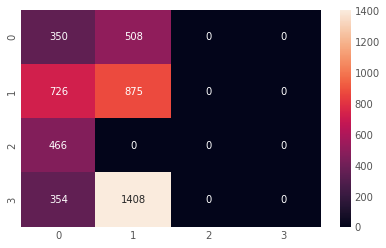

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Birch_Confusion_matrix = confusion_matrix(y_test, Birch_y_preds)
sns.heatmap(Birch_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Birch_y_preds))

              precision    recall  f1-score   support

           0       0.18      0.41      0.25       858
           1       0.31      0.55      0.40      1601
           2       0.00      0.00      0.00       466
           3       0.00      0.00      0.00      1762

    accuracy                           0.26      4687
   macro avg       0.12      0.24      0.16      4687
weighted avg       0.14      0.26      0.18      4687



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
evalTable = pd.DataFrame()

evalTable['Models'] = ['K-Nearest Neighbor Classifier', 'Light Gradient Boosting Machine', 'Random Forests Classifier', 'XGBoost',  'Support Vector Machines', 'Decision Tree', 'Naive Bayes', 'Gradient Boosting']
evalTable['Accuracy'] = [
                         metrics.accuracy_score(y_test, y_predk),
                         metrics.accuracy_score(y_test, LGBM_y_preds),
                         metrics.accuracy_score(y_test, RF_y_preds),
                         metrics.accuracy_score(y_test, XGB_pred),
                         
                         metrics.accuracy_score(y_test, SVM_pred),
                         metrics.accuracy_score(y_test, y_preddt),
                         metrics.accuracy_score(y_test, GNB_y_preds),
                         metrics.accuracy_score(y_test, LGBM_y_preds)]
evalTable['Precision Score'] = [
                                metrics.precision_score(y_test, y_predk,average = 'macro'),
                                metrics.precision_score(y_test, LGBM_y_preds,average = 'macro'),
                                metrics.precision_score(y_test, RF_y_preds,average = 'macro'),
                                metrics.precision_score(y_test, XGB_pred,average = 'macro'),
                                metrics.precision_score(y_test, SVM_pred,average = 'macro'),
                                metrics.precision_score(y_test, y_preddt,average = 'macro'),
                                metrics.precision_score(y_test, GNB_y_preds,average = 'macro'), 
                                metrics.precision_score(y_test, LGBM_y_preds, average = 'macro')]
evalTable['Recall Score'] = [
                             metrics.recall_score(y_test, y_predk,average = 'macro'),
                             metrics.recall_score(y_test, LGBM_y_preds,average = 'macro'),
                             metrics.recall_score(y_test, RF_y_preds,average = 'macro'),
                             metrics.recall_score(y_test, XGB_pred,average = 'macro'),
                             metrics.recall_score(y_test, SVM_pred,average = 'macro'),
                             metrics.recall_score(y_test, y_preddt,average = 'macro'),
                             metrics.recall_score(y_test, GNB_y_preds,average = 'macro'),
                             metrics.recall_score(y_test, LGBM_y_preds,average = 'macro')]
evalTable['F1 Score'] = [
                         metrics.f1_score(y_test, y_predk,average = 'macro'),
                         metrics.f1_score(y_test, LGBM_y_preds,average = 'macro'),
                         metrics.f1_score(y_test, RF_y_preds,average = 'macro'),
                         metrics.f1_score(y_test, XGB_pred,average = 'macro'),
                         metrics.f1_score(y_test, SVM_pred,average = 'macro'),
                         metrics.f1_score(y_test, y_preddt,average = 'macro'),
                         metrics.f1_score(y_test, GNB_y_preds,average = 'macro'),
                         metrics.f1_score(y_test, LGBM_y_preds,average = 'macro')]

evalTable

Models  Accuracy  Precision Score  Recall Score  \
0    K-Nearest Neighbor Classifier  0.815660         0.842820      0.840237   
1  Light Gradient Boosting Machine  0.875613         0.894610      0.887400   
2        Random Forests Classifier  0.872413         0.893757      0.884738   
3                          XGBoost  0.865372         0.886465      0.880497   
4          Support Vector Machines  0.755921         0.813943      0.770007   
5                    Decision Tree  0.821208         0.844893      0.847367   
6                      Naive Bayes  0.727758         0.772453      0.791770   
7                Gradient Boosting  0.875613         0.894610      0.887400   

   F1 Score  
0  0.841461  
1  0.890715  
2  0.888807  
3  0.883279  
4  0.784162  
5  0.846087  
6  0.776512  
7  0.890715

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of Decision Tree:",accuracy_score(y_test,y_preddt))
print("Accuracy of LGBM:",accuracy_score(y_test,LGBM_y_preds))
print("Accuracy of XGBoost:", accuracy_score(y_test, XGB_pred))
print("Accuracy of SVM:",accuracy_score(y_test,SVM_pred))
print("Accuracy of Random Forest:",accuracy_score(y_test,RF_y_preds))
print("Accuracy of Naive Bayes:",accuracy_score(y_test, GNB_y_preds))
print("Accuracy of KNN:",accuracy_score(y_test,y_predk))
print("Accuracy of K-Means:",accuracy_score(y_test,km_pred))
print("Accuracy of Agglomerative Clustering:",accuracy_score(y_test,Acluster_y_preds))
print("Accuracy of Birch Clustering:",accuracy_score(y_test,Birch_y_preds))

Accuracy of Decision Tree: 0.8212075954768508
Accuracy of LGBM: 0.8756133987625346
Accuracy of XGBoost: 0.8653723063793471
Accuracy of SVM: 0.7559206315340303
Accuracy of Random Forest: 0.8724130573927885
Accuracy of Naive Bayes: 0.7277576274802645
Accuracy of KNN: 0.8156603371026243
Accuracy of K-Means: 0.3891615105611265
Accuracy of Agglomerative Clustering: 0.2613612118625987
Accuracy of Birch Clustering: 0.2613612118625987


Text(0.5, 1.0, 'Accuracy Score of Different Models')

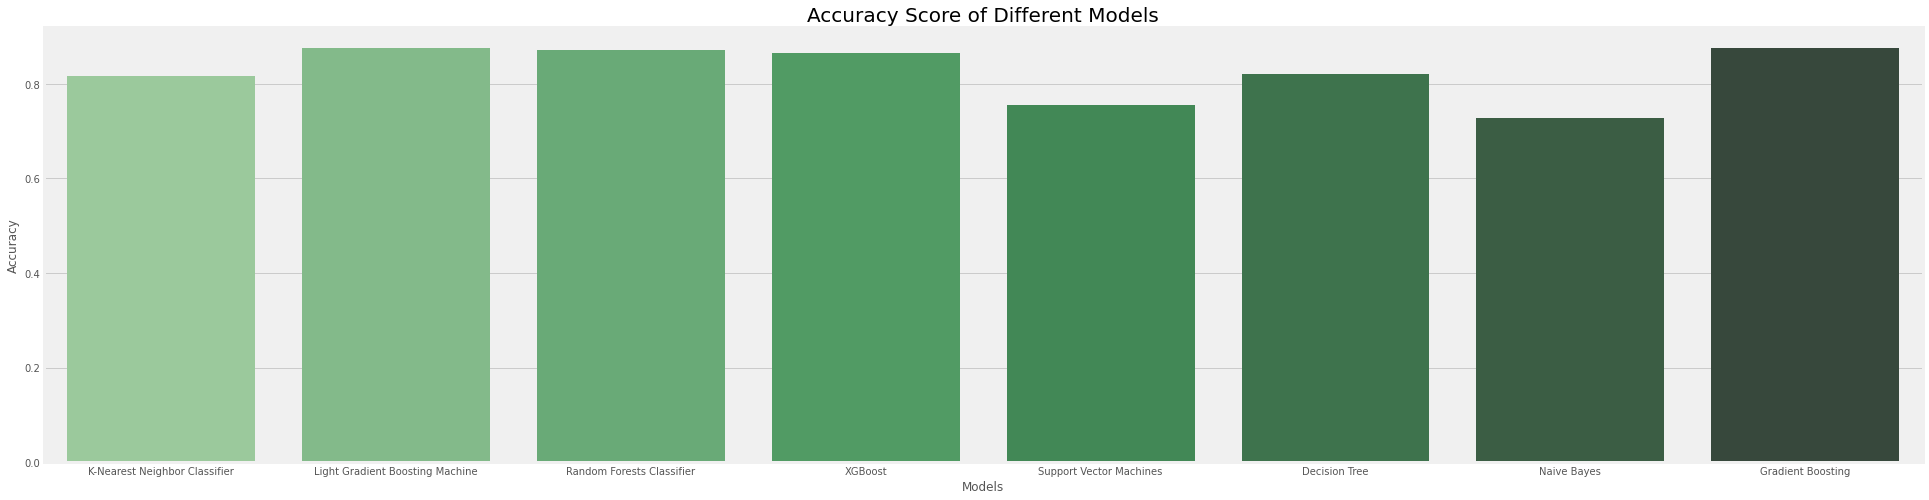

In [ ]:
plt.figure(figsize=(30,8))
ax = sns.barplot(x=evalTable['Models'], y=evalTable['Accuracy'], palette="Greens_d")
plt.title("Accuracy Score of Different Models", size=20)

Text(0.5, 1.0, 'F1 Score of Different Models')

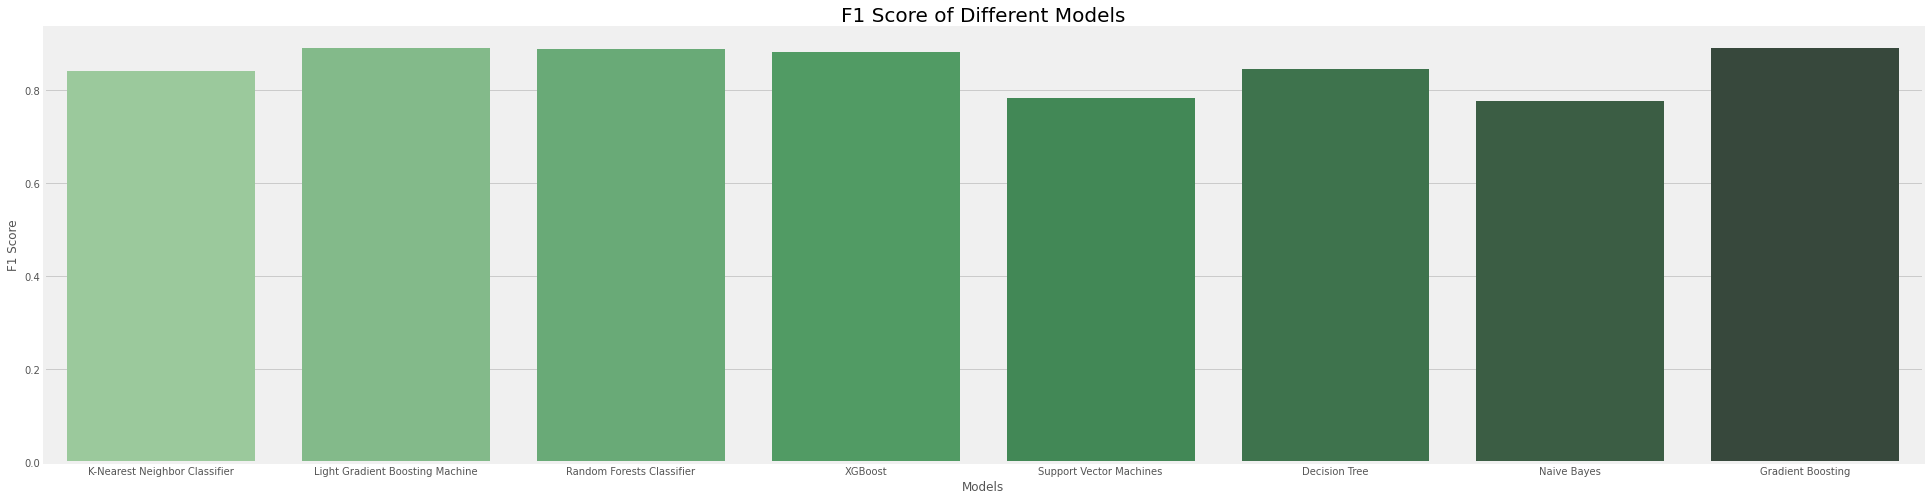

In [ ]:
plt.figure(figsize=(30,8))
ax = sns.barplot(x=evalTable['Models'], y=evalTable['F1 Score'], palette="Greens_d")
plt.title("F1 Score of Different Models", size=20)

Text(0.5, 1.0, 'Accuracy VS F1 Score')

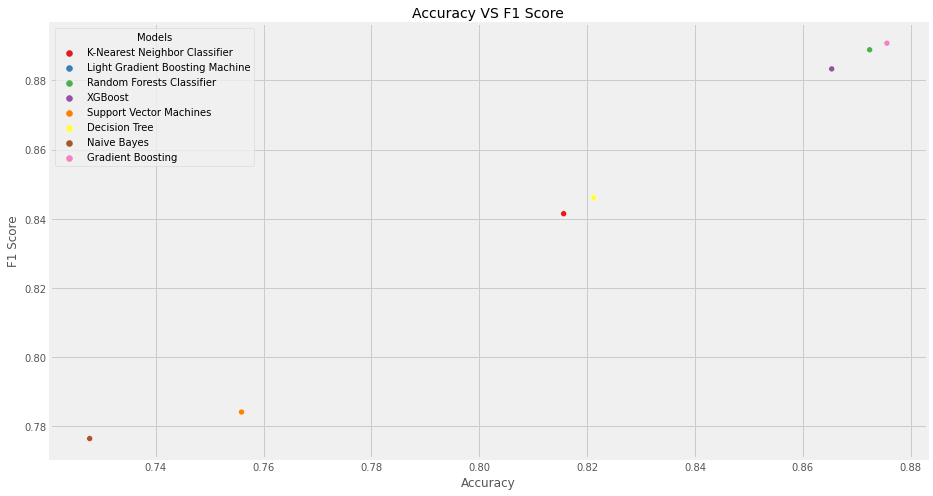

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Accuracy", y="F1 Score", 
                hue="Models", data=evalTable, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Accuracy VS F1 Score", size=14)

### Inference
- If we are looking at precision and recall, then we can directly look at F1 Score to get a clear picture of what is happening, since F1 Score is the harmonic mean of precision and recall,
    - we can see that __Light Gradient Boosting Classifier__ is giving the highest F1 Score, thus telling us that this is the best model for predicting the `coverType` in our dataset
    - whereas logistic regression is giving the least obviously since it is a regression model and not a classification model.

### Inference
- From this plot we can easily see that the best model to predict `CoverType` in our case will start from  __Light Gradient Boosting Classifier__ at the top right
- then __Random Forest Classifier__ and __XG Boost__ and so on